# Исследование объявлений о продаже квартир
В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Наша задача определять рыночную стоимость объектов недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.


По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Описание данных
<b>airports_nearest</b> — расстояние до ближайшего аэропорта в метрах (м)<br>
<b>balcony</b> — число балконов<br>
<b>ceiling_height</b> — высота потолков (м)<br>
<b>cityCenters_nearest</b> — расстояние до центра города (м)<br>
<b>days_exposition</b> — сколько дней было размещено объявление (от публикации до снятия)<br>
<b>first_day_exposition</b> — дата публикации<br>
<b>floor</b> — этаж<br>
<b>floors_total</b> — всего этажей в доме<br>
<b>is_apartment</b> — апартаменты (булев тип)<br>
<b>kitchen_area</b> — площадь кухни в квадратных метрах (м²)<br>
<b>last_price</b> — цена на момент снятия с публикации<br> 
<b>living_area</b> — жилая площадь в квадратных метрах (м²)<br> 
<b>locality_name</b> — название населённого пункта<br>
<b>open_plan</b> — свободная планировка (булев тип)<br>
<b>parks_around3000</b> — число парков в радиусе 3 км<br/> 
<b>parks_nearest</b> — расстояние до ближайшего парка (м)<br> 
<b>ponds_around3000</b> — число водоёмов в радиусе 3 км<br>
<b>ponds_nearest</b> — расстояние до ближайшего водоёма (м)<br> 
<b>rooms</b> — число комнат<br>
<b>studio</b> — квартира-студия (булев тип)<br>
<b>total_area</b> — общая площадь квартиры в квадратных метрах (м²)<br>
<b>total_images</b> — число фотографий квартиры в объявлении<br>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn

# Знакомимся с данными

In [2]:
df = pd.read_csv(r'C:\Users\Arthur\Documents\Data\real_estate_final\real_estate_data.csv', sep='\t')
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
df.info()
# Вывели основную информацию нашего датафрейма. В глаза сразу бросаются пропуски и некорректные типы данных. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

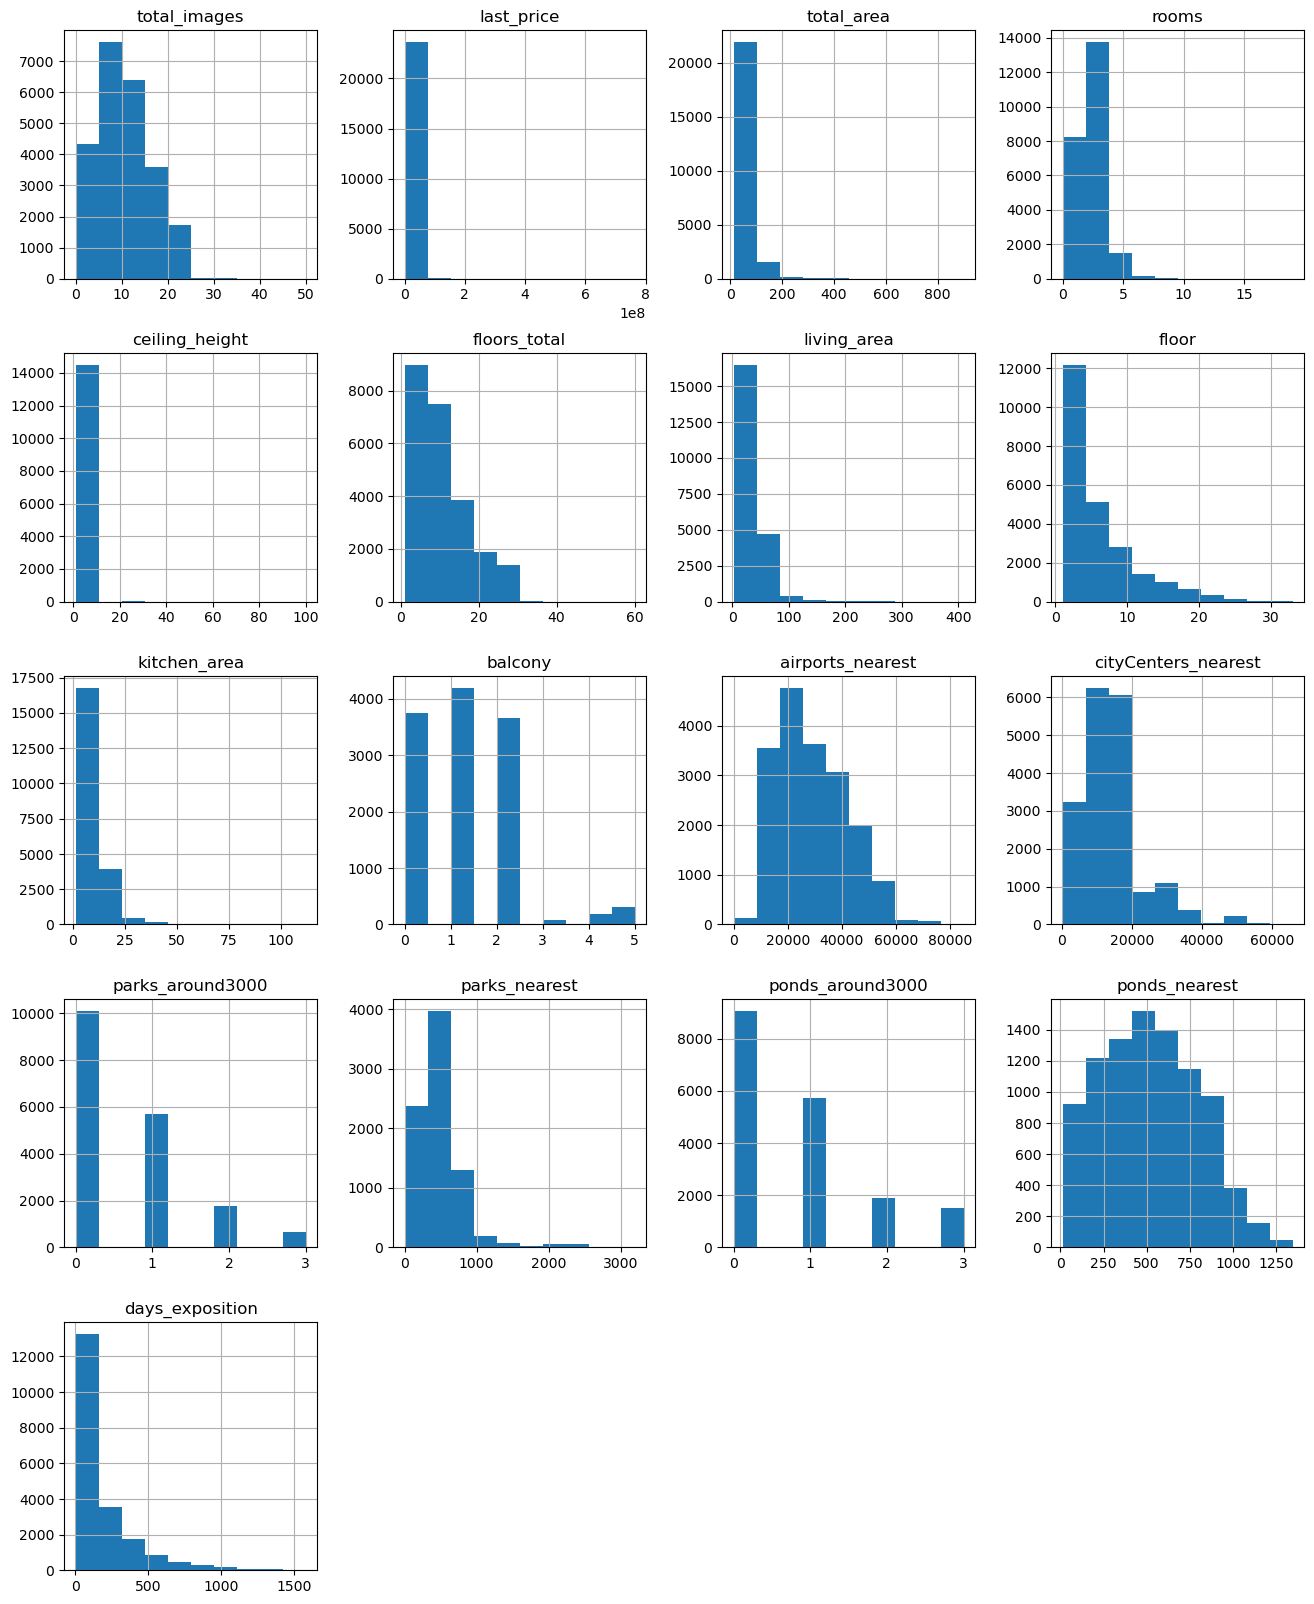

In [4]:
df.hist(figsize=(16, 20))
plt.show()
# Предварительно построим гистограммы для числовых типов.

In [5]:
df.describe().T
# Метод describe выведет нам общую статистику датафрейма, а также для читабельности транспонирует таблицу.
# На первый взгляд видны аномалии в ceiling_height

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


In [6]:
# Изучим кол-во пропусков в датафрейме
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
# Проверим наличие явных дубликатов
df.duplicated().sum()

0

In [8]:
# Отразим пропуски нагляднее, создав функцию
name = []
percent = []
def count_null(df):
    for row in df.columns:
        result =  df[row].isnull().sum()
        name.append(row)
        per = result / len(df)
        percent.append(round((result / len(df)*100.),2))
        print(f'В столбце \033[1m{row}\033[0m пропущено - \033[1m{result}\033[0m значений - \033[1m{per:.2%}\033[0m от общества кол-во данных.')

count_null(df)

В столбце total_images пропущено - 0 значений - 0.00% от общества кол-во данных.
В столбце last_price пропущено - 0 значений - 0.00% от общества кол-во данных.
В столбце total_area пропущено - 0 значений - 0.00% от общества кол-во данных.
В столбце first_day_exposition пропущено - 0 значений - 0.00% от общества кол-во данных.
В столбце rooms пропущено - 0 значений - 0.00% от общества кол-во данных.
В столбце ceiling_height пропущено - 9195 значений - 38.80% от общества кол-во данных.
В столбце floors_total пропущено - 86 значений - 0.36% от общества кол-во данных.
В столбце living_area пропущено - 1903 значений - 8.03% от общества кол-во данных.
В столбце floor пропущено - 0 значений - 0.00% от общества кол-во данных.
В столбце is_apartment пропущено - 20924 значений - 88.29% от общества кол-во данных.
В столбце studio пропущено - 0 значений - 0.00% от общества кол-во данных.
В столбце open_plan пропущено - 0 значений - 0.00% от общества кол-во данных.
В столбце kitchen_area пропущено 

In [9]:
# Продолжим отражать пропуски нагляднее, создав датафрейм
data_null = pd.DataFrame(index = name , data = percent, columns = ['percent'])
data_null.sort_values(by='percent', ascending=False)

,percent
is_apartment,88.29
parks_nearest,65.91
ponds_nearest,61.56
balcony,48.61
ceiling_height,38.80
airports_nearest,23.38
cityCenters_nearest,23.29
ponds_around3000,23.28
parks_around3000,23.28
days_exposition,13.42


<center><b>Причины возникновения пропусков</b></center>

<b>is_apartment</b> - скорее всего если явно не указано, что это апартаменты, то этот объект недвижимости не является апартаментами. Заполним False.<br>
<b>parks_nearest</b>  - заполнять не будет по причине того, что зависимость между ценой и расстоянием до ближайшего парка мы рассматривать не будем.<br>
<b>ponds_nearest</b> - заполнять не будет по причине того, что зависимость между ценой и расстоянием до ближайшего пруда мы рассматривать не будем.<br>
<b>balcony</b> - можно предположить, что если явно не указали кол-во балконов, то в этом объекте скорее всего балконы отсутствуют. Золним значением 0.<br>
<b>ceiling_height</b> - Высоту потолков заполнять не будем. Исправим только аномалии.<br>
<b>airports_nearestt</b> - заполнять не будет по причине того, что зависимость между ценой и расстоянием до аэропорта мы рассматривать не будем.<br>
<b>cityCenters_nearest</b> - заполнять не будет по причине того мы не знаем точный адрес объекта.<br>
<b>ponds_around3000</b> - заполнять не будет по причине того, что зависимость между ценой и кол-во прудов на рассториянии 3к метров рассматривать не будем.<br>
<b>parks_around3000</b> - заполнять не будет по причине того, что зависимость между ценой и кол-во парков на рассториянии 3к метров рассматривать не будем.<br>
<b>days_exposition</b> - заполнять не будет по причине того, что нет возможности уточнить природу пропущенных значений. Можно предположить, что пропуск означает то, что объявление еще активно. Не будем гадать на кофейной гуще. Идем дальше<br>
<b>kitchen_area</b> - если это студия, то многие не указывают площадь кухни. 0 заполнять тоже не хочется. Пропуски оставим.<br>
<b>living_area</b> - если это студия, то многие не указывают жилую площаь. 0 заполнять тоже не хочется. Пропуски оставим.<br>
<b>floors_total</b> - никак заполнить не будем, у нас отсутствует точный адрес объекта. Не можем определить точное кол-во этажей. Уберем данные из датафрейма, они не составляют и половины процента. <br>
<b>locality_name</b> - никак заполнить не будем, определить точный адрес не имеем возможности. Уберем данные из датафрейма, они не составляют и половины процента.<br>

# Предобработка данных

In [10]:
# Удалим колонки, которые будут учавствовать в расчетах.
df.drop(['total_images', 'open_plan'], axis= 1 , inplace= True )

In [11]:
# уберем пустые значения в столбцах floors_total и locality_name
good_df = df[(df['floors_total'].notnull()) & (df['locality_name'].notnull())]
good_df.isnull().sum()

last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment            20805
studio                      0
kitchen_area             2222
balcony                 11475
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [12]:
# Заполним пропуски в столбце is_apartment.
good_df['is_apartment'].fillna(False, inplace=True)
good_df['is_apartment'].unique()

C:\Users\Arthur\AppData\Local\Temp\ipykernel_23208\1130280701.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_df['is_apartment'].fillna(False, inplace=True)


array([False,  True])

In [13]:
# Заполним пропуски в столбце balcony.
good_df['balcony'].fillna(0, inplace=True)
good_df['balcony'].unique()

C:\Users\Arthur\AppData\Local\Temp\ipykernel_23208\1736436809.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_df['balcony'].fillna(0, inplace=True)


array([0., 2., 1., 5., 4., 3.])

<b>Изменение типа данных<b/>

In [14]:
# Данные в столбце first_day_exposition должны иметь тип datetime64, чтобы была возможность прозводитть с данным столбцом манипуляции
good_df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

C:\Users\Arthur\AppData\Local\Temp\ipykernel_23208\1862958682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')


In [15]:
# Данные в столбцах floors_total, balcony, parks_around3000, ponds_around3000 должны иметь целочисленный тип данных.
# Используем Int64, чтобы обойти пропуски
good_df['floors_total'] = good_df['floors_total'].astype('Int64')
good_df['floors_total'] = good_df['floors_total'].astype('Int64')
good_df['balcony'] = good_df['balcony'].astype('int64')
good_df['parks_around3000'] = good_df['parks_around3000'].astype('Int64')
good_df['ponds_around3000'] = good_df['ponds_around3000'].astype('Int64')
# good_df['days_exposition'] = good_df['days_exposition'].astype('Int64')

C:\Users\Arthur\AppData\Local\Temp\ipykernel_23208\1963699038.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_df['floors_total'] = good_df['floors_total'].astype('Int64')
C:\Users\Arthur\AppData\Local\Temp\ipykernel_23208\1963699038.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_df['floors_total'] = good_df['floors_total'].astype('Int64')
C:\Users\Arthur\AppData\Local\Temp\ipykernel_23208\1963699038.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [16]:
# проверим тип данных в столбцах после изменений, все ок
good_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   last_price            23565 non-null  float64       
 1   total_area            23565 non-null  float64       
 2   first_day_exposition  23565 non-null  datetime64[ns]
 3   rooms                 23565 non-null  int64         
 4   ceiling_height        14481 non-null  float64       
 5   floors_total          23565 non-null  Int64         
 6   living_area           21700 non-null  float64       
 7   floor                 23565 non-null  int64         
 8   is_apartment          23565 non-null  bool          
 9   studio                23565 non-null  bool          
 10  kitchen_area          21343 non-null  float64       
 11  balcony               23565 non-null  int64         
 12  locality_name         23565 non-null  object        
 13  airports_nearest

In [17]:
# Изучим уникальные значения в столбце locality_name с названиями населенных пунктов.
# Перед этим все названия приведем к нижнему регистру.
good_df['locality_name'] = good_df['locality_name'].str.lower()
good_df['locality_name'].unique()

C:\Users\Arthur\AppData\Local\Temp\ipykernel_23208\103067505.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_df['locality_name'] = good_df['locality_name'].str.lower()


array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина', 'поселок мурино',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'поселок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', '

In [18]:
# Заменим буквы ё на е, уплотним данные, приведя к общему виду. Заменим городской поселок на поселок городского типа.
good_df['locality_name'] = good_df['locality_name'].str.replace('ё', 'е')
good_df['locality_name'] = good_df['locality_name'].str.replace('городской поселок','поселок городского типа')

C:\Users\Arthur\AppData\Local\Temp\ipykernel_23208\3829332857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_df['locality_name'] = good_df['locality_name'].str.replace('ё', 'е')
C:\Users\Arthur\AppData\Local\Temp\ipykernel_23208\3829332857.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_df['locality_name'] = good_df['locality_name'].str.replace('городской поселок','поселок городского типа')


In [19]:
# Выведем уникальные значения столбца locality_name. 
# Заметим, что данные уплотнились, но могут присутствовать неявные дубликаты.
good_df['locality_name'].sort_values().unique()

array(['бокситогорск', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'высоцк', 'гатчина', 'деревня агалатово', 'деревня аро',
       'деревня батово', 'деревня бегуницы', 'деревня белогорка',
       'деревня большая вруда', 'деревня большая пустомержа',
       'деревня большие колпаны', 'деревня большое рейзино',
       'деревня большой сабск', 'деревня бор', 'деревня борисова грива',
       'деревня ваганово', 'деревня вартемяги', 'деревня вахнова кара',
       'деревня выскатка', 'деревня гарболово', 'деревня глинка',
       'деревня горбунки', 'деревня гостилицы', 'деревня заклинье',
       'деревня заневка', 'деревня зимитицы', 'деревня извара',
       'деревня иссад', 'деревня калитино', 'деревня кальтино',
       'деревня камышовка', 'деревня каськово', 'деревня келози',
       'деревня кипень', 'деревня кисельня', 'деревня колтуши',
       'деревня коркино', 'деревня котлы', 'деревня кривко',
       'деревня кудрово', 'деревня кузьмолово', 'деревня курковицы',
       'дер

In [20]:
# Избавимся от типов населенных пунктов для устранения повторов в столбце locality_name. 
# Добавим усеченные названия в новый столбец locality_name_new
words_to_remove = ['деревня', 'поселок городского типа', 'село', 'поселок', 'садовое товарищество', 'садоводческое некоммерческое товарищество']
pattern = '|'.join(r'\b{}\b'.format(word) for word in words_to_remove)  # Создание шаблона регулярного выражения
good_df.insert(loc= 15 , column='locality_name_new', value=good_df['locality_name'].str.replace(pattern, '', regex=True)) # Замена слов с помощью регулярного выражения
good_df['locality_name_new'] = good_df['locality_name_new'].str.strip()

C:\Users\Arthur\AppData\Local\Temp\ipykernel_23208\3713563200.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_df['locality_name_new'] = good_df['locality_name_new'].str.strip()


In [21]:
# Проверим результат, все хорошо, идем дальше.
good_df['locality_name_new'].sort_values().unique()

array(['агалатово', 'александровская', 'алексеевка', 'аннино', 'аро',
       'барышево', 'батово', 'бегуницы', 'белогорка', 'белоостров',
       'бокситогорск', 'большая вруда', 'большая ижора',
       'большая пустомержа', 'большие колпаны', 'большое рейзино',
       'большой сабск', 'бор', 'борисова грива', 'бугры', 'будогощь',
       'ваганово', 'важины', 'вартемяги', 'вахнова кара', 'виллози',
       'вознесенье', 'возрождение', 'войсковицы', 'войскорово',
       'володарское', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'вырица', 'выскатка', 'высокоключевой', 'высоцк', 'гаврилово',
       'гарболово', 'гатчина', 'гладкое', 'глажево', 'глебычево',
       'глинка', 'гончарово', 'горбунки', 'гостилицы', 'громово',
       'дзержинского', 'дружная горка', 'дружноселье', 'дубровка',
       'елизаветино', 'ефимовский', 'жилгородок', 'жилпоселок', 'житково',
       'заводской', 'заклинье', 'заневка', 'запорожское', 'зеленогорск',
       'зимитицы', 'ивангород', 'извара', 'ильичев

Добавим в таблицу новые столбцы со следующими параметрами:
- цена одного квадратного метра
- день недели публикации объявления (0 — понедельник, 1 — вторник и далее по списку)
- месяц публикации объявления
- год публикации объявления
- тип этажа квартиры (первый, последний, другой)
- расстояние до центра города в километрах 

In [22]:
# Добавим стоимость одного квадратного метра.
good_df['cost_per_ square'] = round(good_df['last_price'] / good_df['total_area'],2)

C:\Users\Arthur\AppData\Local\Temp\ipykernel_23208\138056357.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_df['cost_per_ square'] = round(good_df['last_price'] / good_df['total_area'],2)


In [23]:
# Добавим день недели, написал функцию weekday
good_df['weekday'] = good_df['first_day_exposition'].dt.weekday
def weekday(day):
    
    if day == 0:
        
        return 'понедельник'
    elif day == 1:
        
        return 'вторник'
    elif day == 2:
        
        return 'среда'
    elif day == 3:
        
        return 'четверг'    
    elif day == 4:
        
        return 'пятница'    
    elif day == 5:
            
        return 'суббота'
    elif day == 6:
            
        return 'воскресенье'
        
good_df['weekday_up'] = good_df['weekday'].apply(weekday)                              

C:\Users\Arthur\AppData\Local\Temp\ipykernel_23208\684685448.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_df['weekday'] = good_df['first_day_exposition'].dt.weekday
C:\Users\Arthur\AppData\Local\Temp\ipykernel_23208\684685448.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_df['weekday_up'] = good_df['weekday'].apply(weekday)


In [24]:
# добавим месяц публикации объявления
good_df['exposition_month'] = good_df['first_day_exposition'].dt.month


C:\Users\Arthur\AppData\Local\Temp\ipykernel_23208\1547879544.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_df['exposition_month'] = good_df['first_day_exposition'].dt.month


In [25]:
# Добавим тип этажа квартиры
def get_type_floor(row):
    
    if row['floor'] == 1:
        
        return 'первый'
    
    elif row['floor'] == row['floors_total']:
        
        return 'последний'
    
    else:
        
        return'другой'
    
good_df['type_floor'] = good_df.apply(get_type_floor, axis=1)
good_df

C:\Users\Arthur\AppData\Local\Temp\ipykernel_23208\2068428351.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_df['type_floor'] = good_df.apply(get_type_floor, axis=1)


,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_ square,weekday,weekday_up,exposition_month,type_floor
0,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,False,...,1,482.0,2,755.0,NaN,120370.37,3,четверг,3,другой
1,3350000.0,40.40,2018-12-04,1,NaN,11,18.6,1,False,False,...,0,NaN,0,NaN,81.0,82920.79,1,вторник,12,первый
2,5196000.0,56.00,2015-08-20,2,NaN,5,34.3,4,False,False,...,1,90.0,2,574.0,558.0,92785.71,3,четверг,8,другой
3,64900000.0,159.00,2015-07-24,3,NaN,14,NaN,9,False,False,...,2,84.0,3,234.0,424.0,408176.10,4,пятница,7,другой
4,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,False,...,2,112.0,1,48.0,121.0,100000.00,1,вторник,6,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,False,False,...,1,796.0,3,381.0,NaN,72490.85,1,вторник,3,другой
23695,3100000.0,59.00,2018-01-15,3,NaN,5,38.0,4,False,False,...,<NA>,NaN,<NA>,NaN,45.0,52542.37,0,понедельник,1,другой
23696,2500000.0,56.70,2018-02-11,2,NaN,3,29.7,1,False,False,...,<NA>,NaN,<NA>,NaN,NaN,44091.71,6,воскресенье,2,первый
23697,11475000.0,76.75,2017-03-28,2,3.00,17,NaN,12,False,False,...,2,173.0,3,196.0,602.0,149511.40,1,вторник,3,другой


In [26]:
# Добавим расстояние до центра города в километрах.
good_df['city_centr_km'] = round(good_df['cityCenters_nearest'] / 1000,2)

C:\Users\Arthur\AppData\Local\Temp\ipykernel_23208\1488508701.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_df['city_centr_km'] = round(good_df['cityCenters_nearest'] / 1000,2)


# Проведем исследовательский анализ данных

In [27]:
# Взглянем еще раз на общие статистические данные датафрейма
good_df.describe().T

,count,mean,std,min,25%,50%,75%,max
last_price,23565.0,6540058.260004,10910934.721514,12190.0,3400000.0,4646000.0,6790000.0,763000000.0
total_area,23565.0,60.322824,35.65706,12.0,40.0,52.0,69.7,900.0
rooms,23565.0,2.070656,1.078591,0.0,1.0,2.0,3.0,19.0
ceiling_height,14481.0,2.771283,1.261983,1.0,2.51,2.65,2.8,100.0
floors_total,23565.0,10.675875,6.594823,1.0,5.0,9.0,16.0,60.0
living_area,21700.0,34.454822,22.045359,2.0,18.6,30.0,42.3,409.7
floor,23565.0,5.878124,4.871485,1.0,2.0,4.0,8.0,33.0
kitchen_area,21343.0,10.560994,5.90063,1.3,7.0,9.1,12.0,112.0
balcony,23565.0,0.593677,0.96066,0.0,0.0,0.0,1.0,5.0
airports_nearest,18041.0,28797.082701,12632.499735,0.0,18565.0,26757.0,37273.0,84869.0


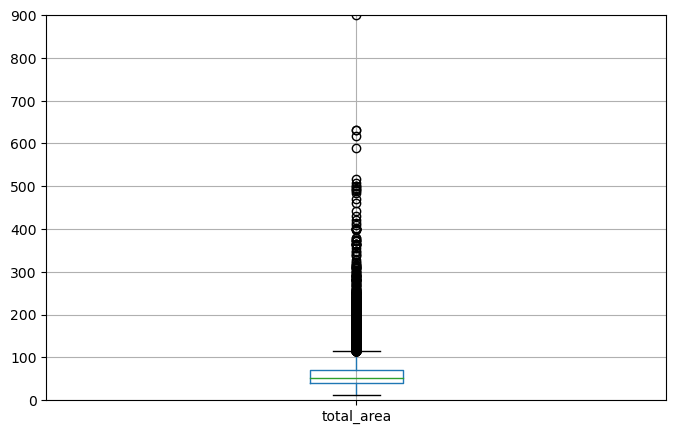

In [28]:
# Построим боксплот для столбца total_area, посмотрим на разброс данных, найдем аномалии.
a = 0
b = total_area_range_max = 900

good_df.boxplot(column='total_area',showfliers=True, figsize=(8,5))

plt.ylim(a, b)
plt.show()

<Axes: >

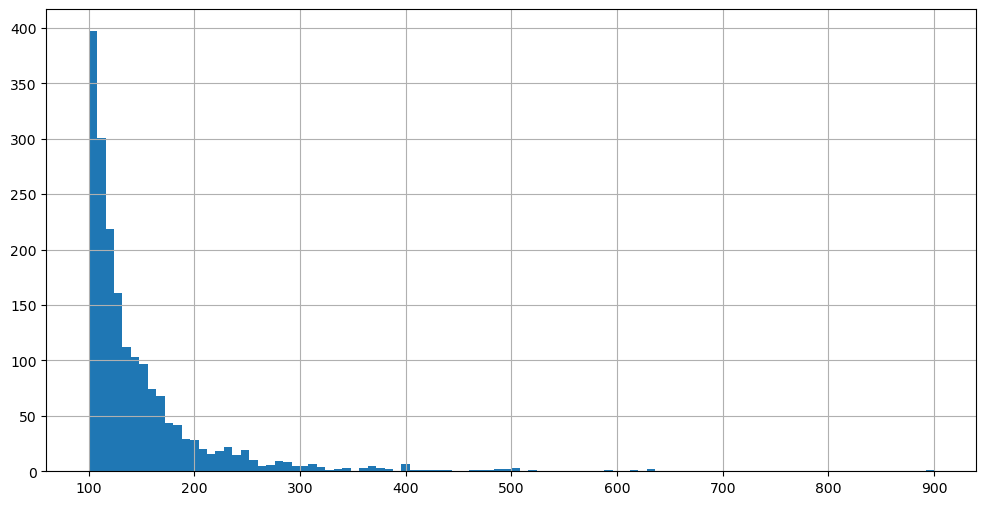

In [29]:
# Построим гистограммы, сделаем выводы.
good_df['total_area'].hist(bins='auto',range=(100, 900), figsize=(12,6))

<Axes: >

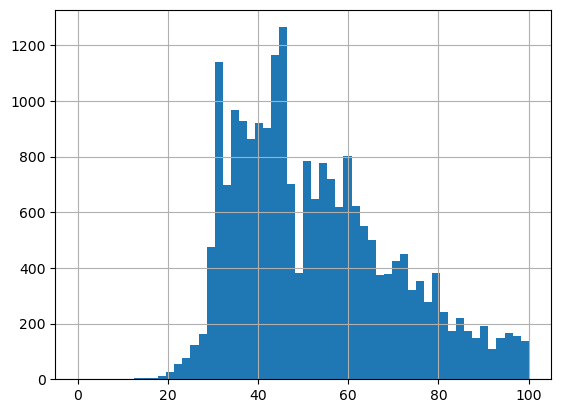

In [30]:
good_df['total_area'].hist(bins='auto', range=(0, 100))

<b>Отметим, что объекты больше 400 кв.м и меньше 10 кв.м уже совсем редкие значения, но они есть. Проверим соотношение.<b/>

In [31]:
round(len(good_df.query('total_area < 10 or total_area > 400')) / len(good_df),4)

0.001

<b>Меньше 1%, часть данных можно отбросить. Сформируем новый срез данных и построим новую гистограмму.<b/>

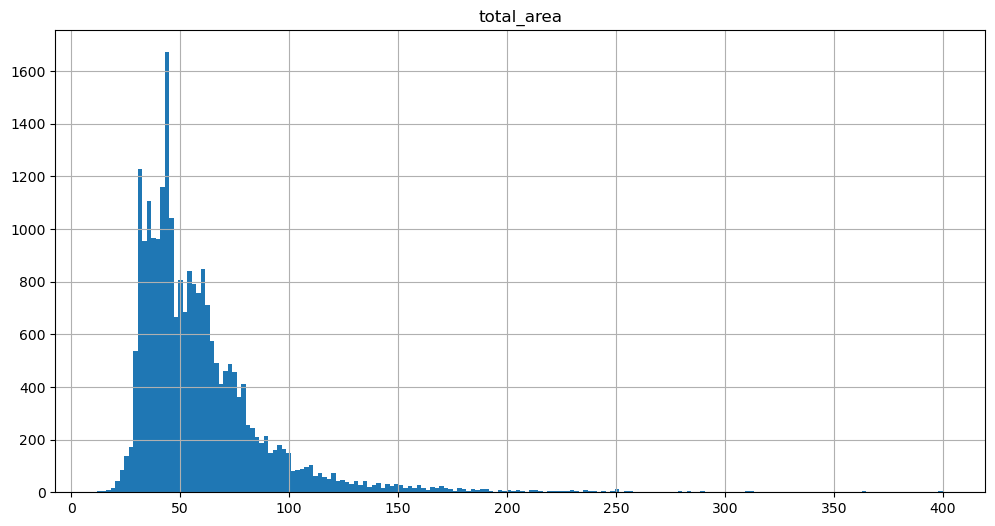

In [32]:
good_df = good_df.query('total_area >= 10 and total_area <= 400')
good_df['total_area'].hist(bins='auto', figsize=(12,6))
plt.title('total_area')
plt.show()

<b>Стало нагляднее, основной пик в районе 40 - 45 кв. метров. А также есть пик около 30 кв. метров.<b/>

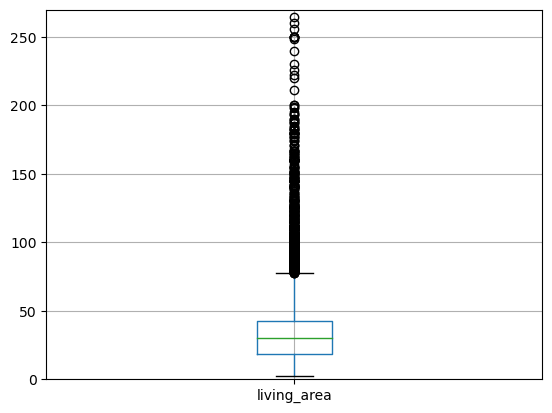

In [33]:
# Построим боксплот для столбца living_area, посмотрим на разброс данных, найдем аномалии.
a = living_area_range_min = 0
b = living_area_range_max = 270
good_df.boxplot(column='living_area',showfliers=True)
plt.ylim(a, b)
plt.show()

<Axes: >

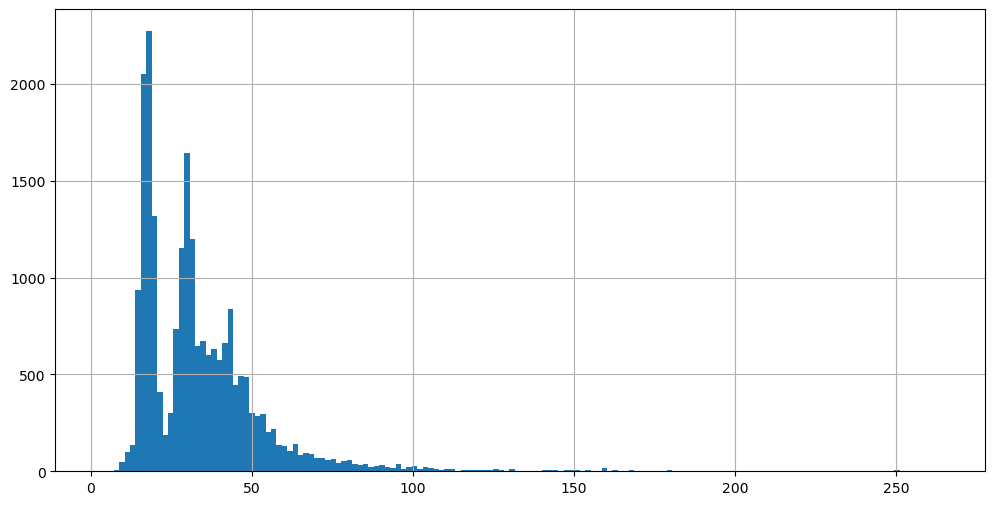

In [34]:
# Построим гистограммы, сделаем выводы.
good_df['living_area'].hist(bins='auto', figsize=(12,6))

<Axes: >

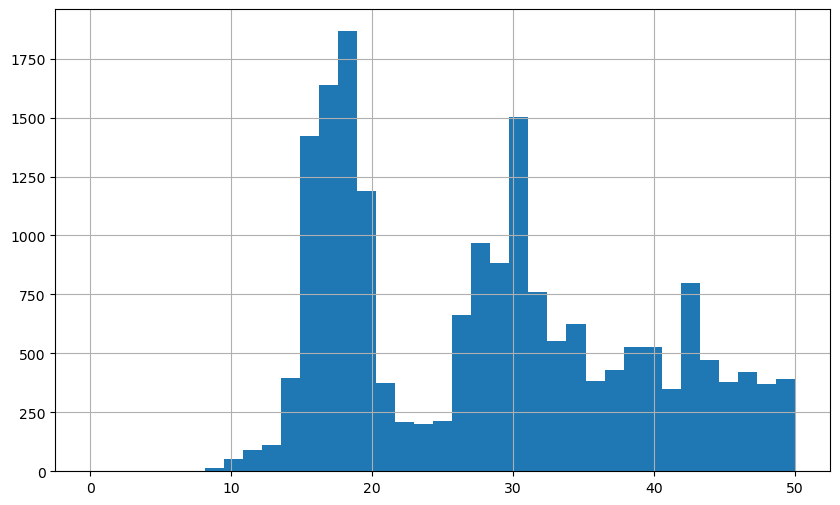

In [35]:
good_df['living_area'].hist(bins='auto', range=(0,50), figsize=(10,6))

<b>Отметим, что объекты больше 150 кв.м и меньше 10 кв.м уже совсем редкие значения. Посмотрим соотношение.<b/>

In [36]:
round(len(good_df.query('living_area < 10 or living_area > 150')) / len(good_df),5)

0.00544

<b>Меньше 1%, часть данных можно отбросить. Сформируем срез набор данных и построим новую гистограмму.</b>

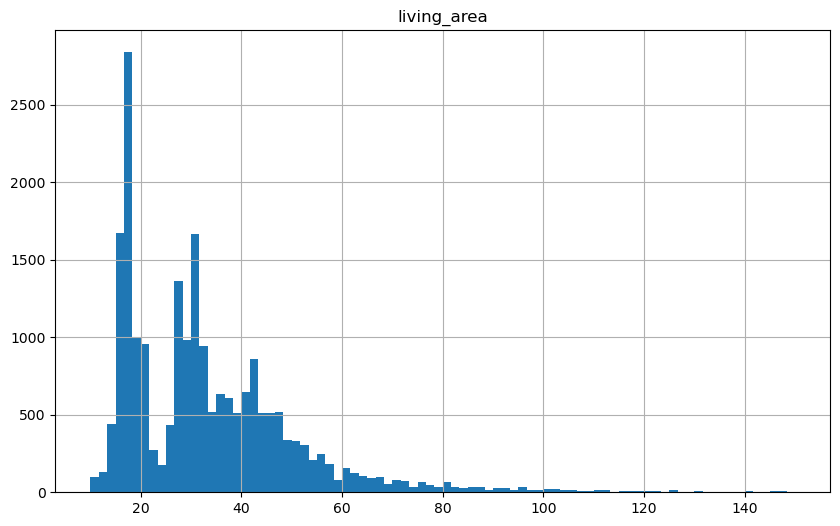

In [37]:
good_df = good_df.query('living_area >= 10 and living_area <= 150')
good_df['living_area'].hist(bins='auto', figsize=(10,6))
plt.title('living_area')
plt.show()

<b>Стало нагляднее, 2 основных пика в районе 17-19 кв.м, 30 кв.м и небольшой пик в районе 43-44 кв.м.<b/>

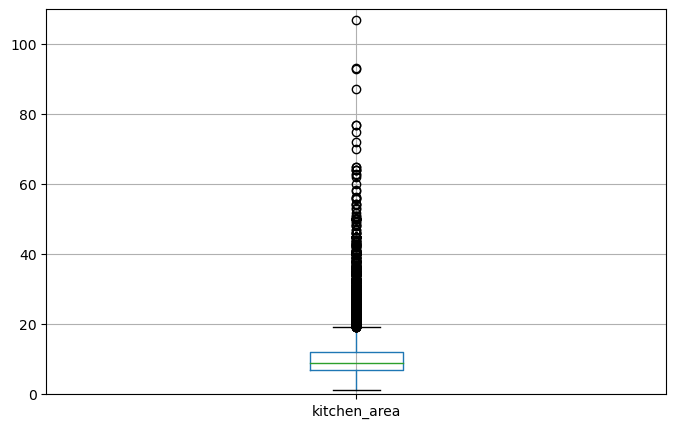

In [38]:
# Построим боксплот для столбца kitchen_area, посмотрим на разброс данных, найдем аномалии.
range_min = 0
range_max = 110



good_df.boxplot(column='kitchen_area', showfliers=True,figsize=(8,5))

plt.ylim(range_min, range_max)  
plt.show()

<Axes: >

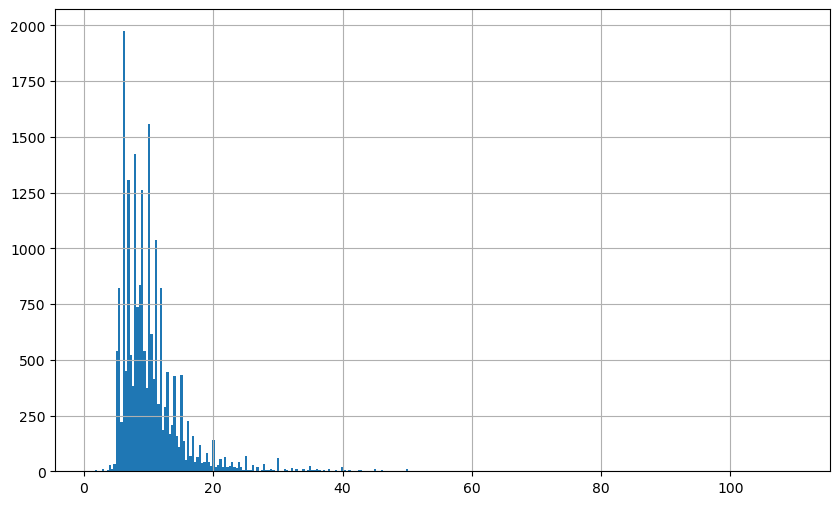

In [39]:
# Построим гистограммы, сделаем выводы.
good_df['kitchen_area'].hist(bins='auto', figsize=(10,6), range=(1,110))

<Axes: >

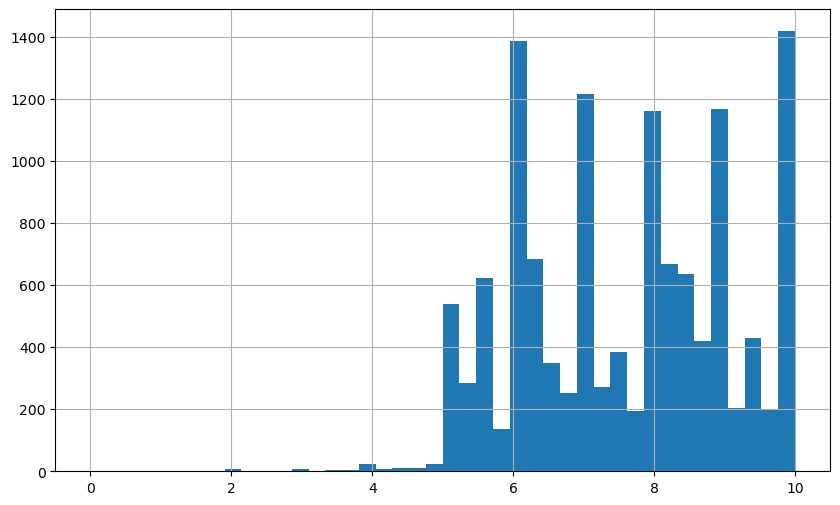

In [40]:
good_df['kitchen_area'].hist(bins='auto', range=(0,10), figsize=(10,6))

<b>Отметим, что объекты больше 40 кв.м и меньше 4 кв.м уже редкие значения. Посмотрим соотношение.<b/>

In [41]:
good_df.query('kitchen_area < 4 or living_area > 40')
round(len(good_df.query('kitchen_area < 5 or kitchen_area > 30')) / len(good_df),4)

0.0169

<b>Чуть больше 1%, часть данных можно отбросить. Сформируем новый срез данных и построим новую гистограмму.<b/>

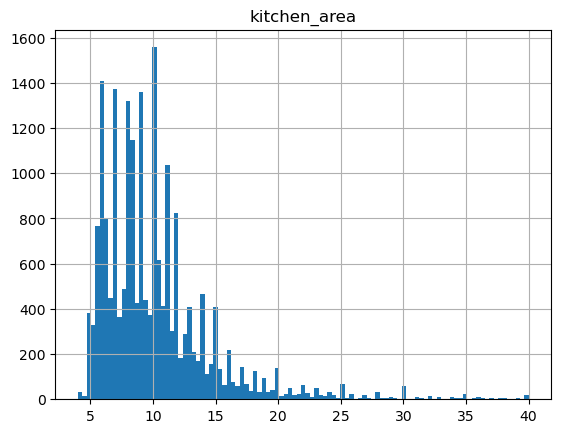

In [42]:
good_df = good_df.query('kitchen_area >= 4 and kitchen_area <= 40')
good_df['kitchen_area'].hist(bins='auto')
plt.title('kitchen_area')
plt.show()

<b>Видим очень много пиков, это говорит о том, что кухни у многих стандратного размера, но стандарт имеет разборс. Думаю, что это зависит от общей площади или кол-во комнат.</b>

<Axes: >

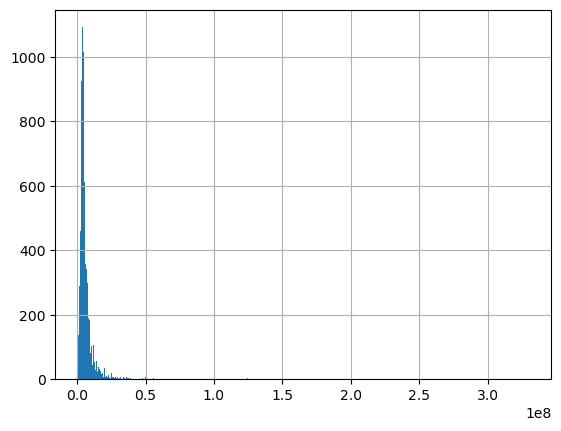

In [43]:
good_df['last_price'].hist(bins='auto')

In [44]:
# Переведем колонку last_price в миллионы, добавив новую колонку last_price_m
try:
    good_df.insert(loc= 1 , column='last_price_mill', value = good_df['last_price'] / 1000000)
except:
    pass


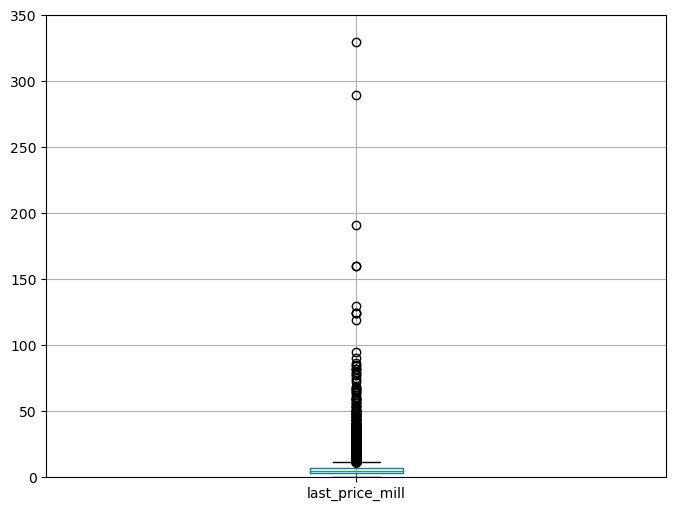

In [45]:
range_min = 0
range_max = 350



good_df.boxplot(column='last_price_mill',showfliers=True,figsize=(8,6))

plt.ylim(range_min, range_max)
plt.show()

<Axes: >

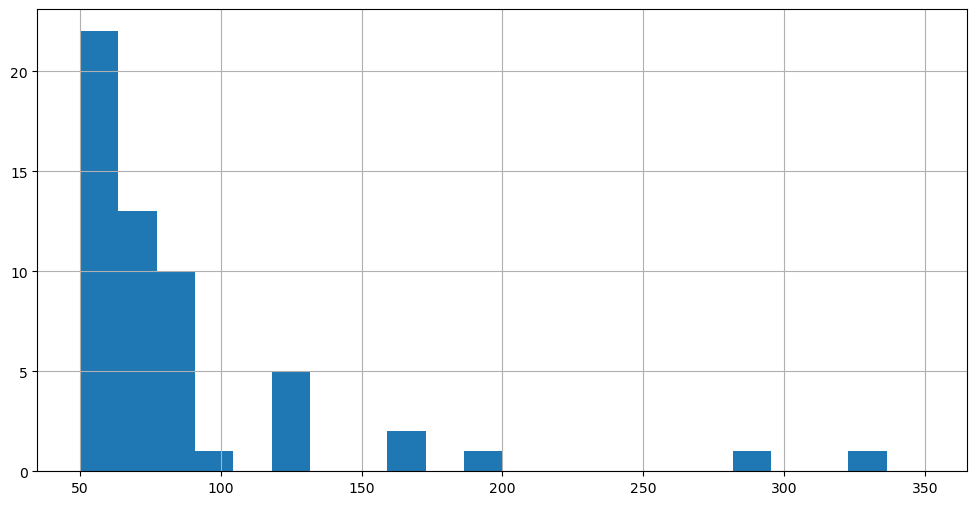

In [46]:
good_df['last_price_mill'].hist(bins='auto', figsize=(12,6), range=(50, 350))

<Axes: >

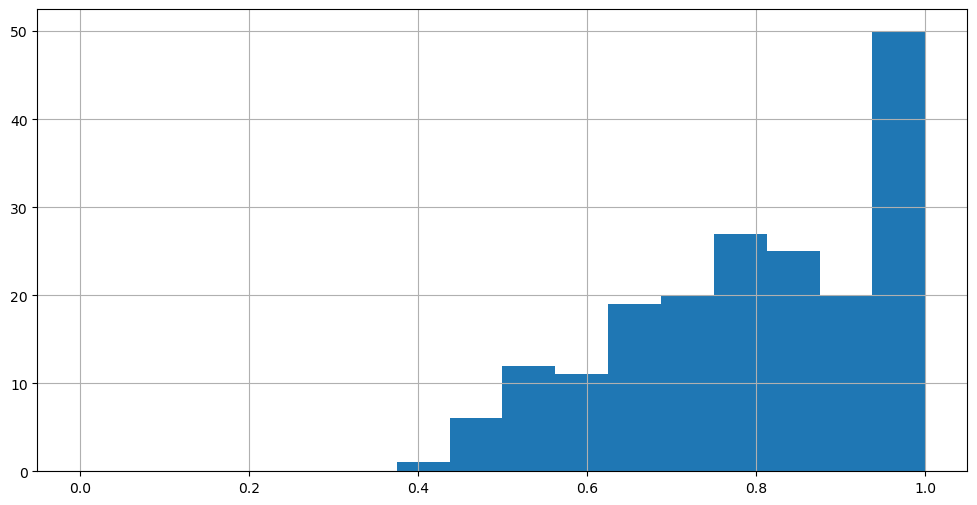

In [47]:
# Построим гистограммы, сделаем выводы
good_df['last_price_mill'].hist(bins='auto', range=(0, 1), figsize=(12,6))

<b>Отметим, что объекты больше 300 м и меньше 0.6 м уже совсем редкие значения. Проверим соотношение.<b/>

In [48]:
round(len(good_df.query('last_price_mill < 0.6 or last_price_mill > 300')) / len(good_df),4)

0.0011

<b>Меньше 1%, часть данных можно отбросить. Сформируем срез набор данных и построим новую гистограмму.<b/>

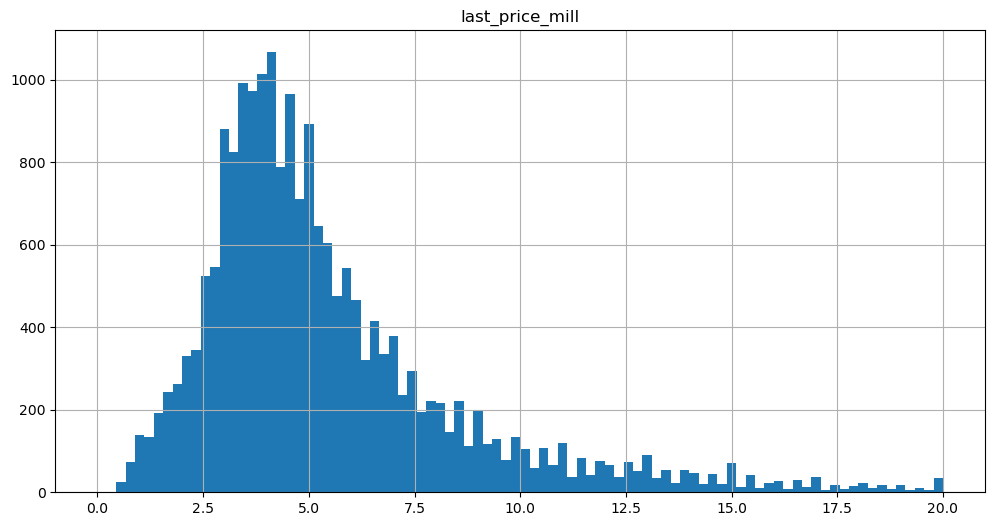

In [49]:
good_df = good_df.query('last_price_mill >= 0.6 and last_price_mill <= 300')
good_df['last_price_mill'].hist(bins='auto', figsize=(12,6), range=(0,20))
plt.title('last_price_mill')
plt.show()

Видим, что в основном стоимость объектов недвижмости около 3.8 м

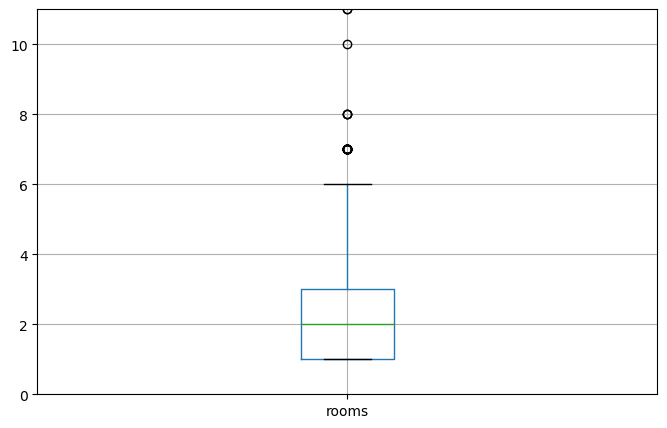

In [50]:
range_min = 0
range_max = 11


good_df.boxplot(column='rooms', showfliers=True,figsize=(8,5))

plt.ylim(range_min, range_max)
plt.show()

<Axes: >

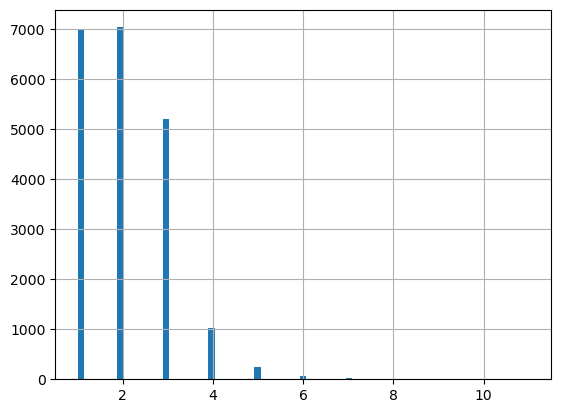

In [51]:
good_df['rooms'].hist(bins='auto')

Отметим, что объектов с 7 и больше комнат очень мало. Проверим соотношение.

In [52]:
good_df.query('rooms > 7')
round(len(good_df.query('rooms > 7')) / len(good_df),4)

0.0003

<b>Меньше 1%, часть данных можно отбросить. Сформируем срез набор данных и построим новую гистограмму.<b/>

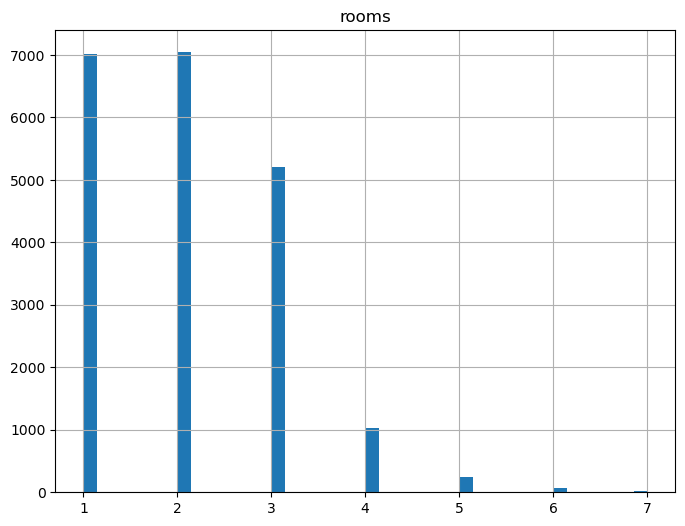

In [53]:
good_df = good_df.query('rooms <= 7')
good_df['rooms'].hist(bins='auto', figsize=(8,6))
plt.title('rooms')
plt.show()

<b>Вывод:</b> В основном продают 1, 2, 3 комнатные квартиры

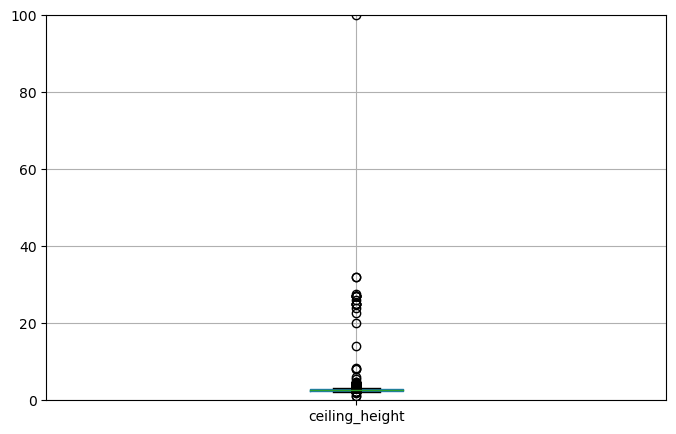

In [54]:
range_min = 0
range_max = 100


# Создайте ящик с усами с заданным диапазоном
good_df.boxplot(column='ceiling_height',showfliers=True,figsize=(8,5))
# showfliers=False скроет выбросы
plt.ylim(range_min, range_max)  # Задайте диапазон по оси Y
plt.show()

<b>Видим много аномальных значений, давайте посмотрим уникальные значения<b/>

In [55]:
value_ceiling_height = []
for row in good_df['ceiling_height'].unique():
    value_ceiling_height.append(row)
sorted(value_ceiling_height)

[1.0,
 2.3,
 2.4,
 2.46,
 2.48,
 2.53,
 2.62,
 2.63,
 2.7,
 nan,
 1.2,
 1.75,
 2.0,
 2.2,
 2.25,
 2.45,
 2.47,
 2.49,
 2.5,
 2.51,
 2.52,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.59,
 2.6,
 2.61,
 2.64,
 2.65,
 2.66,
 2.67,
 2.68,
 2.69,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.58,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.7,
 3.75,
 3.78,
 3.8,
 3.83,
 3.84,
 3.85,
 3.86,
 3.87,
 3.88,
 3.9,
 3.93,
 3.95,
 3.98,
 4.0,
 4.06,
 4.1,
 4.15,
 4.19,
 4

<b>Заметили аномалии. Например, высота потолков указана 14, 20, 22.6, 24, 25, 26, 27, 27.5, 32 и 100. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м и так далее. Заменим.<b/>

In [56]:
good_df['ceiling_height'] = good_df['ceiling_height'].replace(100, 10)
good_df['ceiling_height'] = good_df['ceiling_height'].replace(32, 3.2)
good_df['ceiling_height'] = good_df['ceiling_height'].replace(27.5, 2.75)
good_df['ceiling_height'] = good_df['ceiling_height'].replace(27, 2.7)
good_df['ceiling_height'] = good_df['ceiling_height'].replace(26, 2.6)
good_df['ceiling_height'] = good_df['ceiling_height'].replace(25, 2.5)
good_df['ceiling_height'] = good_df['ceiling_height'].replace(24, 2.4)
good_df['ceiling_height'] = good_df['ceiling_height'].replace(22.6, 2.26)
good_df['ceiling_height'] = good_df['ceiling_height'].replace(20, 2)
good_df['ceiling_height'] = good_df['ceiling_height'].replace(20, 2)
good_df['ceiling_height'] = good_df['ceiling_height'].replace(14, 1.4)

In [57]:
value_ceiling_height = []
for row in good_df['ceiling_height'].unique():
    value_ceiling_height.append(row)
sorted(value_ceiling_height)

[1.0,
 2.3,
 2.4,
 2.45,
 2.46,
 2.48,
 2.53,
 2.62,
 2.63,
 2.7,
 nan,
 1.2,
 1.4,
 1.75,
 2.0,
 2.2,
 2.25,
 2.26,
 2.47,
 2.49,
 2.5,
 2.51,
 2.52,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.59,
 2.6,
 2.61,
 2.64,
 2.65,
 2.66,
 2.67,
 2.68,
 2.69,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.58,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.7,
 3.75,
 3.78,
 3.8,
 3.83,
 3.84,
 3.85,
 3.86,
 3.87,
 3.88,
 3.9,
 3.93,
 3.95,
 3.98,
 4.0,
 4.06,
 4.1,
 4.

<b>Все хорошо, давайте еще раз посмотрим разброс.<b/>

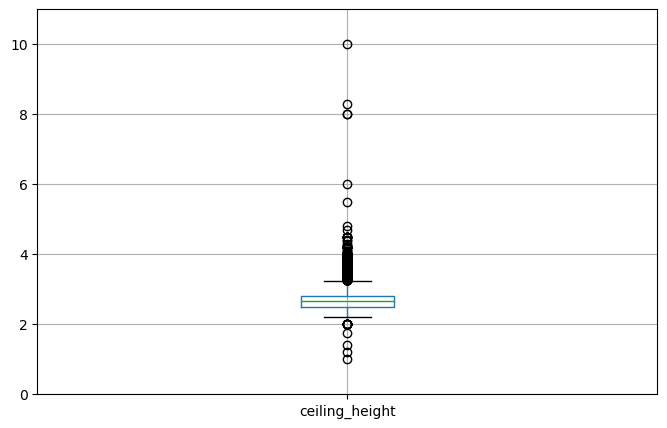

In [58]:
range_min = 0
range_max = 11

good_df.boxplot(column='ceiling_height',showfliers=True,figsize=(8,5))
plt.ylim(range_min, range_max)  
plt.show()

<Axes: >

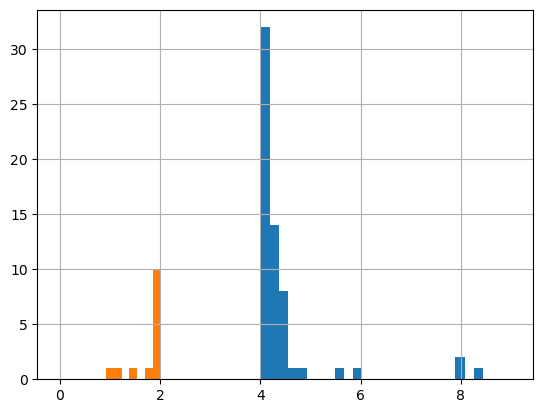

In [59]:
good_df['ceiling_height'].hist(bins='auto', range=(4,9))
good_df['ceiling_height'].hist(bins='auto', range=(0,2))

<b>Отметим, что объекты с высотой потолков больше 4.5 м и меньше 2 м не так много. Проверим соотношение.<b/>

In [60]:
round(len(good_df.query('ceiling_height < 2 or ceiling_height > 4.5')) / len(good_df), 10)

0.0005820439

<b>Меньше 1%, часть данных можно отбросить. Сформируем срез набор данных и построим новую гистограмму.<b/>

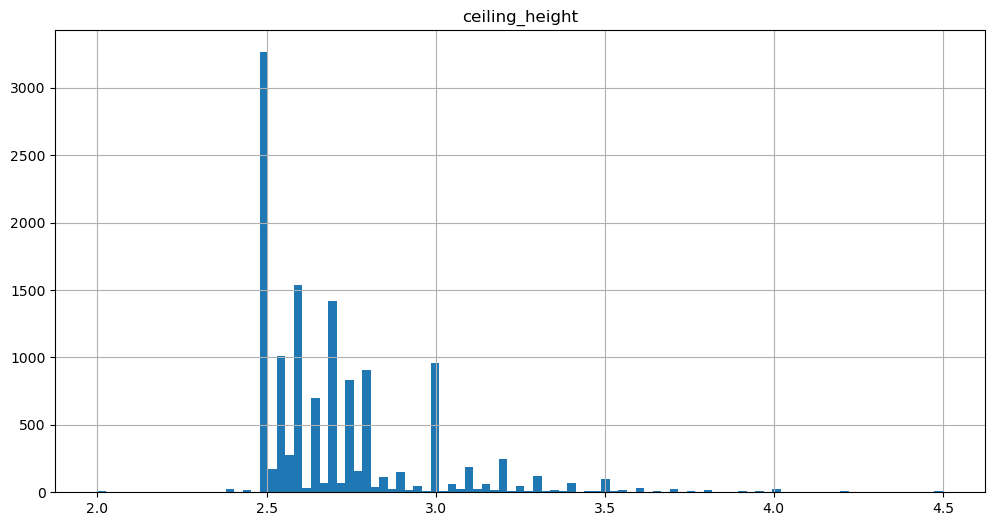

In [61]:
good_df = good_df.query('(ceiling_height >= 2 and ceiling_height <= 4.5) or ceiling_height.isnull()')
good_df['ceiling_height'].hist(bins='auto', figsize=(12,6))
plt.title('ceiling_height')
plt.show()
# Не забудем оставить пропуски в столбце сeiling_height, чтобы не потерять много данных с пустыми значениями

<b>Видим очень много пиков, это говорит о том, что высота потолков у многих стандратного размера, но стандарт имеет разброс. Самая типичная высота потолков 2.5 метров<b/>

<Axes: >

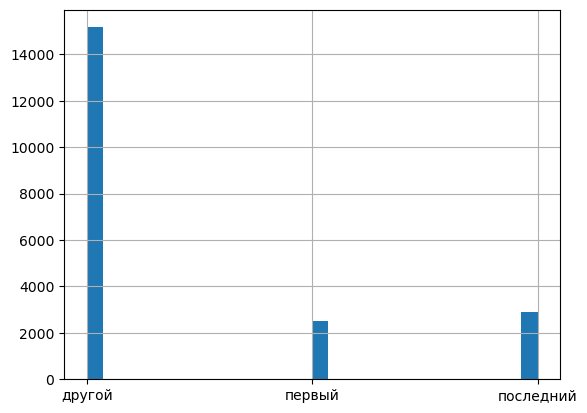

In [62]:
good_df['type_floor'].hist(bins='auto')

<b>Видим типичное распределние данных по типу этажа. Идем дальше.<b/>

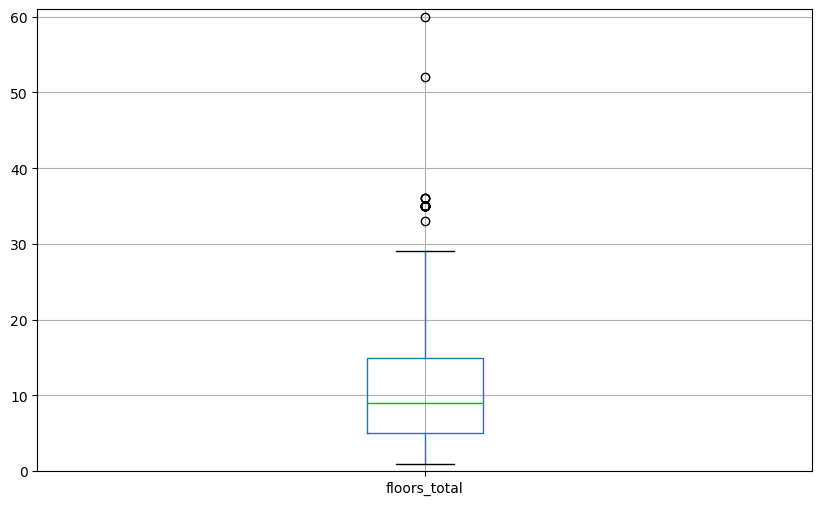

In [63]:
range_min = 0
range_max = 61

good_df.boxplot(column='floors_total', showfliers=True, figsize=(10, 6))
plt.ylim(range_min, range_max)  
plt.show()

<Axes: >

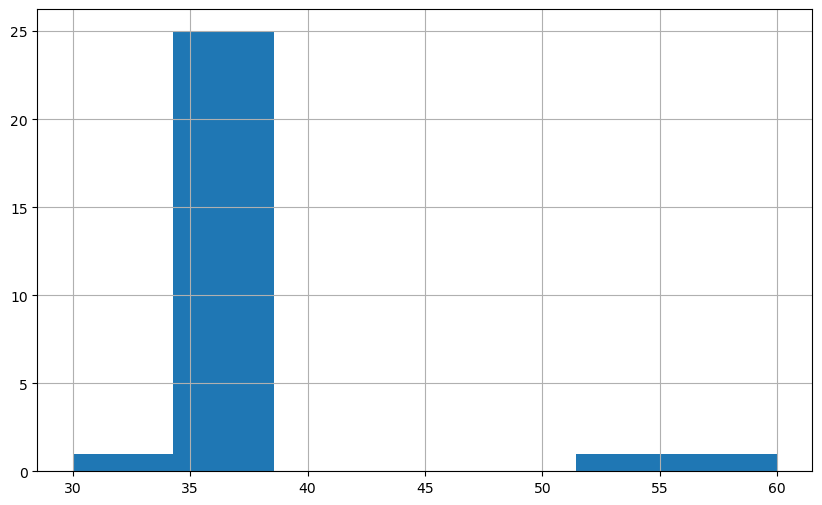

In [66]:
good_df['floors_total'].hist(bins='auto', figsize=(10,6),range=(30, 60))

In [68]:
good_df['floors_total'] = good_df['floors_total'].astype('int64') # поменяем тип данных с Int64 на int64, так как возникат конфликт с query  
round(len(good_df.query('floors_total > 40')) / len(good_df), 4)

0.0001

<b>Меньше 1%, часть данных можно отбросить. Сформируем срез набор данных и построим новую гистограмму.<b/>

Меньше 1%, часть данных можно отбросить. Сформируем срез набор данных и построим новую гистограмму.

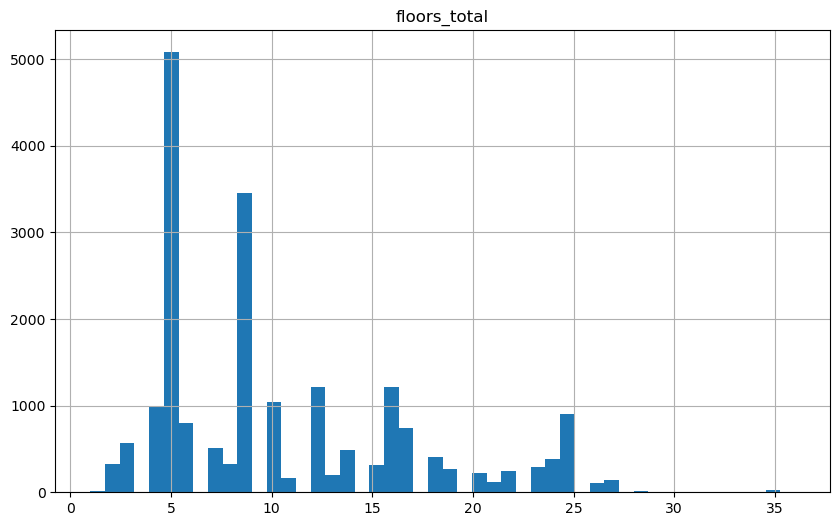

In [70]:
good_df = good_df.query('floors_total <= 40')
good_df['floors_total'].hist(bins='auto', figsize=(10,6))
plt.title('floors_total')
plt.show()

In [72]:
good_df.describe().T

,count,mean,std,min,25%,50%,75%,max
last_price,20603.0,6069184.259817,6263547.58823,600000.0,3500000.0,4650000.0,6700000.0,289238400.0
last_price_mill,20603.0,6.069184,6.263548,0.6,3.5,4.65,6.7,289.2384
total_area,20603.0,58.792359,27.453082,20.0,40.4,52.0,69.0,365.0
rooms,20603.0,2.066301,0.987924,1.0,1.0,2.0,3.0,7.0
ceiling_height,13107.0,2.716065,0.260053,2.0,2.5,2.65,2.8,4.5
floors_total,20603.0,10.592923,6.50148,1.0,5.0,9.0,15.0,36.0
living_area,20603.0,33.661334,17.868067,10.0,18.795,30.0,42.1,150.0
floor,20603.0,5.841043,4.813019,1.0,2.0,4.0,8.0,33.0
kitchen_area,20603.0,10.210497,4.655281,4.0,7.0,9.0,11.8,40.0
balcony,20603.0,0.622288,0.970906,0.0,0.0,0.0,1.0,5.0


<b>Видим пики на 5 и 9 этажных зданиях. Можем сделать вывод, что в Санк-Петербурего и его области преимущественно малоэтажная застройка.<b/>

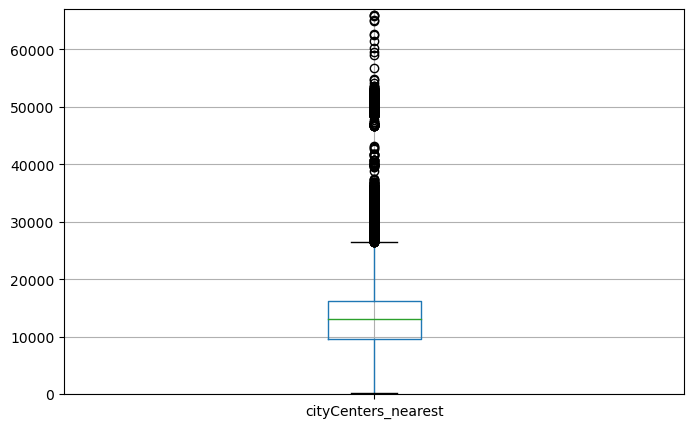

In [74]:
range_min = 0
range_max = 67000

good_df.boxplot(column='cityCenters_nearest',showfliers=True, figsize=(8,5))
plt.ylim(range_min, range_max)  
plt.show()

<Axes: >

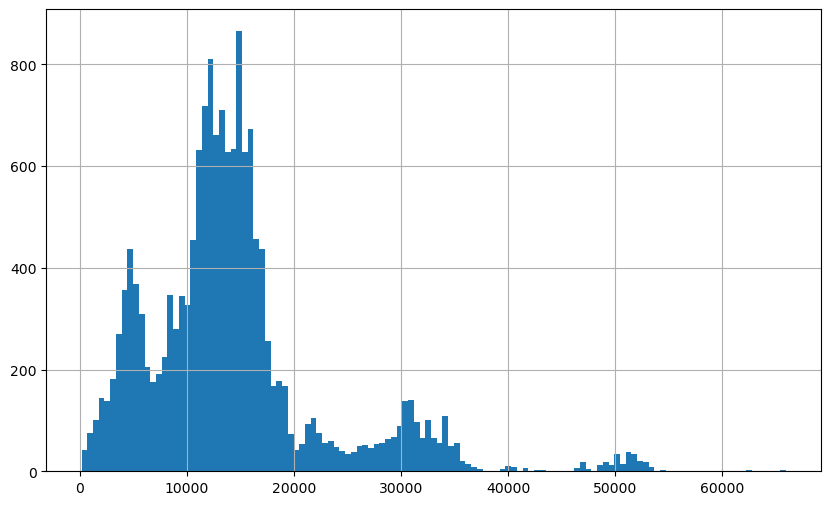

In [75]:
good_df['cityCenters_nearest'].hist(bins='auto', figsize=(10,6))

<b/>Отметим, что объектов с удаленностью 55000 м не так много. Проверим соотношение.<b/>

In [76]:
round(len(good_df.query('cityCenters_nearest > 55000')) / len(good_df), 4)

0.0006

<b>Меньше 1%, часть данных можно отбросить. Сформируем срез набор данных и построим новую гистограмму.<b/>

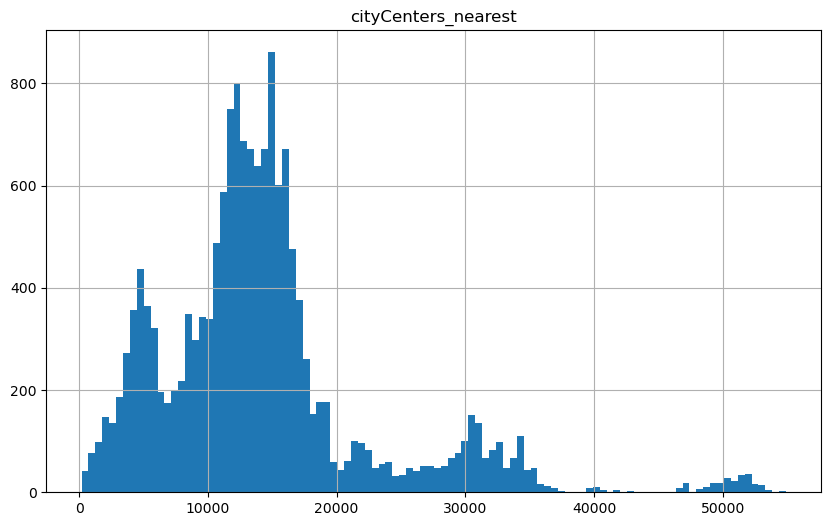

In [78]:
good_df = good_df.query('cityCenters_nearest <= 55000 or cityCenters_nearest.isnull()')
good_df['cityCenters_nearest'].hist(bins='auto', figsize=(10,6))
plt.title('cityCenters_nearest')
plt.show()

In [80]:
good_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20591 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   last_price            20591 non-null  float64       
 1   last_price_mill       20591 non-null  float64       
 2   total_area            20591 non-null  float64       
 3   first_day_exposition  20591 non-null  datetime64[ns]
 4   rooms                 20591 non-null  int64         
 5   ceiling_height        13098 non-null  float64       
 6   floors_total          20591 non-null  int64         
 7   living_area           20591 non-null  float64       
 8   floor                 20591 non-null  int64         
 9   is_apartment          20591 non-null  bool          
 10  studio                20591 non-null  bool          
 11  kitchen_area          20591 non-null  float64       
 12  balcony               20591 non-null  int64         
 13  locality_name   

<b>Размещенные объекты находятся в основном на удалении от 12 км до 16 км, а также видны всплески на расстоянии 50км. <b/>

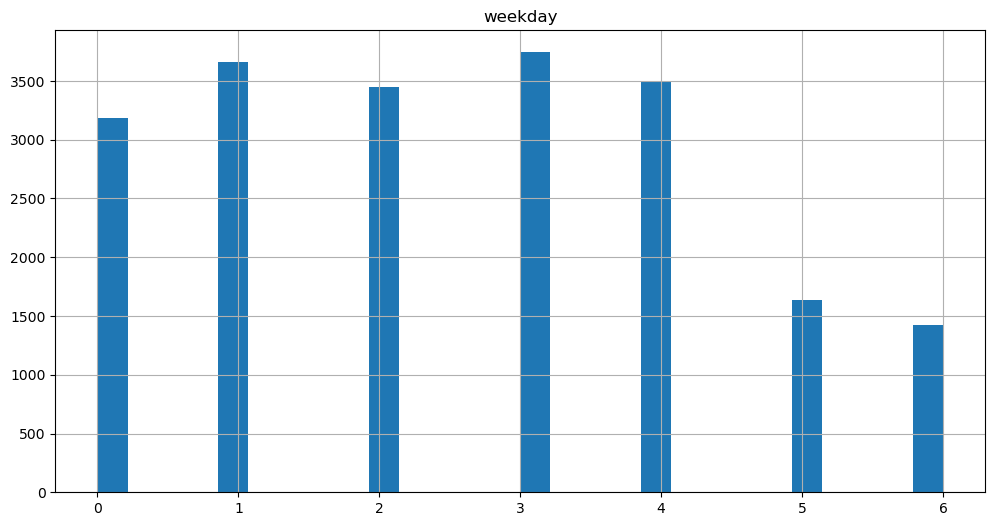

In [111]:
good_df['weekday'].hist(bins='auto', figsize=(12,6))
plt.title('weekday')
plt.show()

<b>Статистически закономерно. В выходные люди как правило отдыхают, поэтому объявлений в эти дни публикуют меньше, чем в будни.<b/>

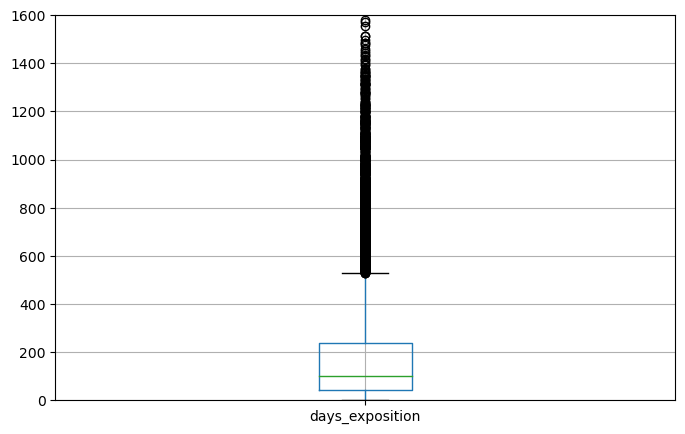

In [114]:
range_min = 0
range_max = 1600


# Создайте ящик с усами с заданным диапазоном
good_df.boxplot(column='days_exposition',showfliers=True,figsize=(8,5))
# showfliers=False скроет выбросы
plt.ylim(range_min, range_max)  # Задайте диапазон по оси Y
plt.show()

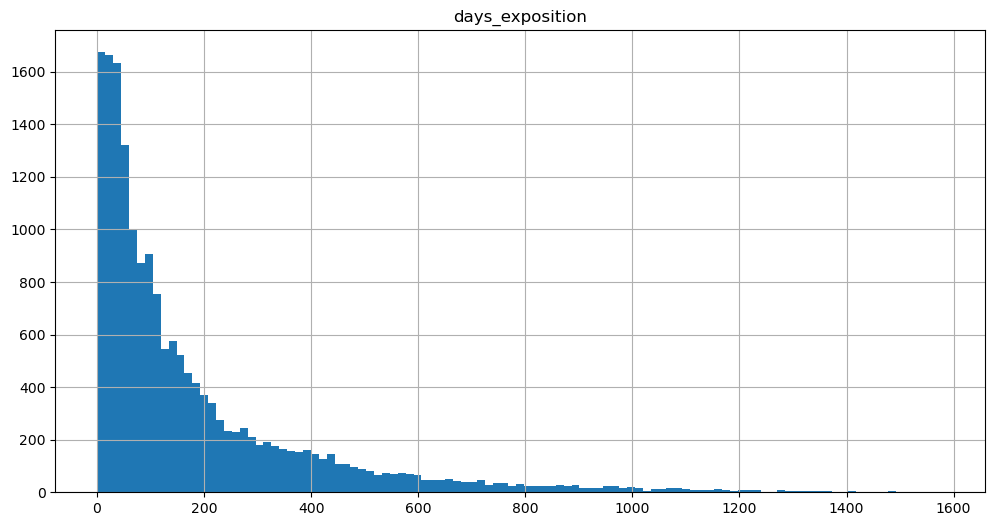

In [115]:
good_df['days_exposition'].hist(bins='auto', figsize=(12,6))
plt.title('days_exposition')
plt.show()

In [119]:
mean_days_exposition = good_df['days_exposition'].mean().round(2)
median_days_exposition = good_df['days_exposition'].median()
max_days_exposition = good_df['days_exposition'].max()
min_days_exposition = good_df['days_exposition'].min()
print(f'Среднее значение столбца days_exposition: {mean_days_exposition}')
print(f'Медианное значение столбца days_exposition: {median_days_exposition}')
print(f'Минимальное значение столбца days_exposition: {min_days_exposition}')
print(f'Максимальное значение столбца days_exposition: {max_days_exposition}')
good_df.describe().T

Среднее значение столбца days_exposition: 184.46
Медианное значение столбца days_exposition: 101.0
Минимальное значение столбца days_exposition: 1.0
Максимальное значение столбца days_exposition: 1580.0


,count,mean,std,min,25%,50%,75%,max
last_price,20591.0,6070773.071002,6265004.029648,600000.0,3500000.0,4650000.0,6700000.0,289238400.0
last_price_mill,20591.0,6.070773,6.265004,0.6,3.5,4.65,6.7,289.2384
total_area,20591.0,58.800338,27.457946,20.0,40.4,52.0,69.0,365.0
rooms,20591.0,2.066388,0.988035,1.0,1.0,2.0,3.0,7.0
ceiling_height,13098.0,2.716199,0.260092,2.0,2.5,2.65,2.8,4.5
floors_total,20591.0,10.59696,6.501168,1.0,5.0,9.0,15.0,36.0
living_area,20591.0,33.664978,17.871409,10.0,18.795,30.0,42.2,150.0
floor,20591.0,5.843281,4.813477,1.0,2.0,4.0,8.0,33.0
kitchen_area,20591.0,10.212572,4.655765,4.0,7.0,9.0,11.8,40.0
balcony,20591.0,0.622408,0.971103,0.0,0.0,0.0,1.0,5.0


<b>По стандартному отклонению можем судить о большом разбросе данных по дням продажи. Относительно быстро продажой можно считать от 44  до 100 дней. Это 25% и до 50% данных соответственно.  Продажи более 230 дней (более 75% данных) уже можно считать долгими.<b/>

In [311]:
good_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20591 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   last_price            20591 non-null  float64       
 1   last_price_mill       20591 non-null  float64       
 2   total_area            20591 non-null  float64       
 3   first_day_exposition  20591 non-null  datetime64[ns]
 4   rooms                 20591 non-null  int64         
 5   ceiling_height        13098 non-null  float64       
 6   floors_total          20591 non-null  int64         
 7   living_area           20591 non-null  float64       
 8   floor                 20591 non-null  int64         
 9   is_apartment          20591 non-null  bool          
 10  studio                20591 non-null  bool          
 11  kitchen_area          20591 non-null  float64       
 12  balcony               20591 non-null  int64         
 13  locality_name   

# Изучим какие факторы влияют на цену больше всего.

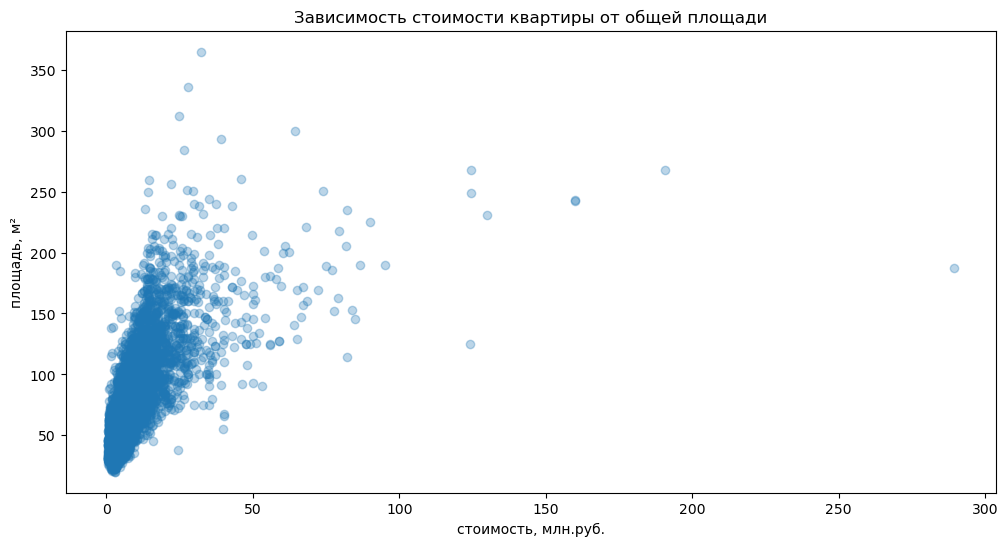

In [457]:
plt.figure(figsize=(12, 6))
plt.scatter(good_df.last_price_mill, good_df.total_area, marker='o', linestyle='-', color='C0',alpha = 0.3)
plt.title('Зависимость стоимости квартиры от общей площади')
plt.xlabel('стоимость, млн.руб.')
plt.ylabel('площадь, м²')
plt.show()

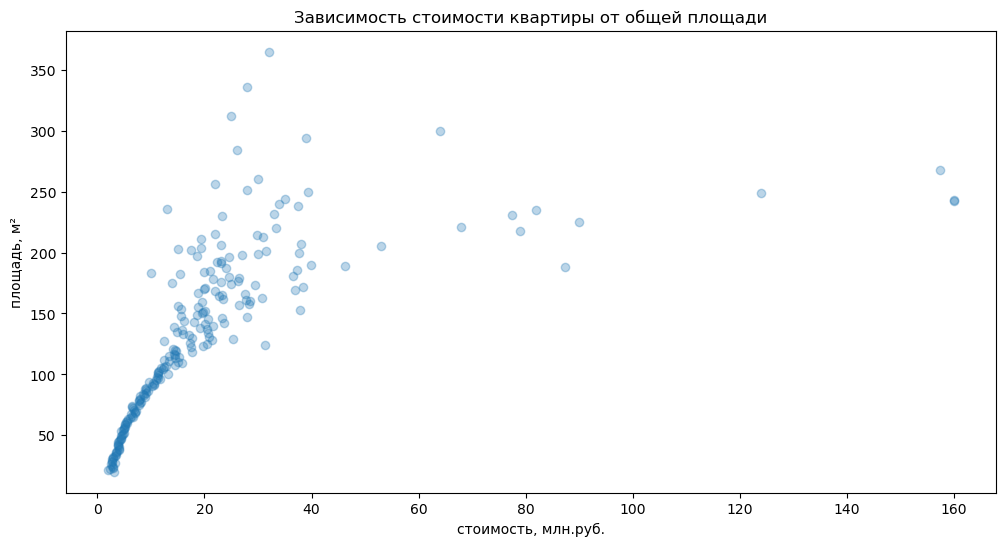

In [458]:
pivot_total_area = good_df.round().pivot_table(index='total_area', values='last_price_mill').sort_values(by='total_area')
plt.figure(figsize=(12, 6))
plt.scatter(pivot_total_area.last_price_mill, pivot_total_area.index, marker='o', linestyle='-', color='C0', alpha = 0.3)
plt.title('Зависимость стоимости квартиры от общей площади')
plt.xlabel('стоимость, млн.руб.')
plt.ylabel('площадь, м²')
plt.show()

In [347]:
round(good_df['total_area'].corr(good_df['last_price']), 2)

0.69

<b>Вывод: </b> После обработки данных можно более увидеть зависимость между ценой и общей площадью. Квартира площадью более 100 кв. метров уже имеет больший разброс цен, т.е линейная зависимость слабеет.

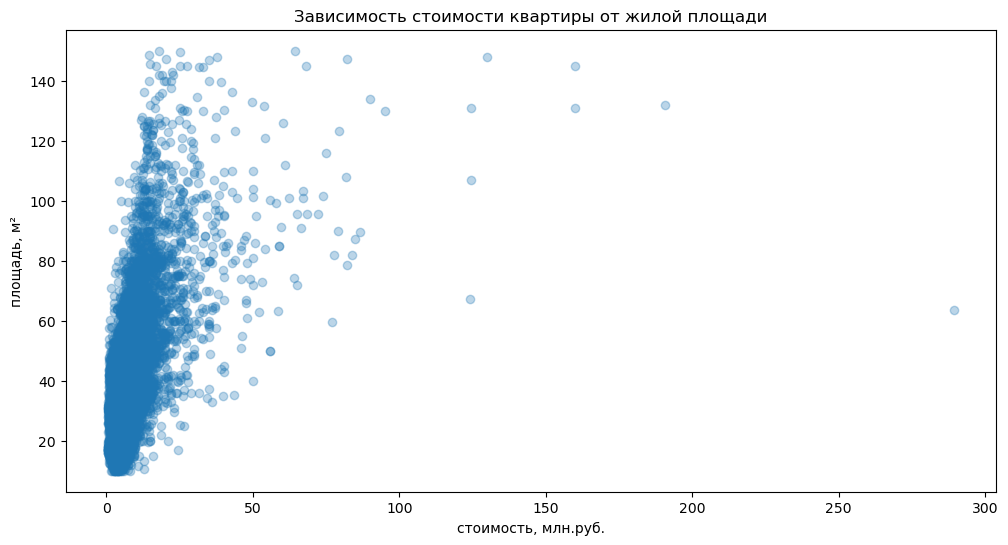

In [459]:
plt.figure(figsize=(12, 6))
plt.scatter(good_df.last_price_mill, good_df.living_area, marker='o', linestyle='-', color='C0',alpha = 0.3)
plt.title('Зависимость стоимости квартиры от жилой площади')
plt.xlabel('стоимость, млн.руб.')
plt.ylabel('площадь, м²')
plt.show()

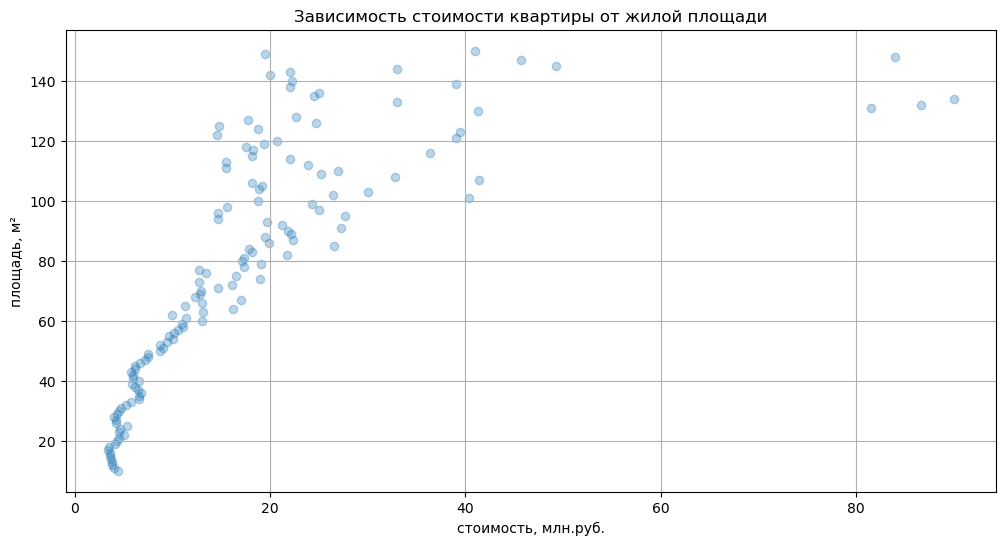

In [460]:
pivot_living_area = good_df.round().pivot_table(index='living_area', values='last_price_mill').sort_values(by='living_area')

plt.figure(figsize=(12, 6))
# plt.xlim([0, 20])
plt.scatter(pivot_living_area.last_price_mill, pivot_living_area.index, marker='o', linestyle='-', color='C0', alpha = 0.3)
plt.title('Зависимость стоимости квартиры от жилой площади')
plt.xlabel('стоимость, млн.руб.')
plt.ylabel('площадь, м²')
plt.grid()
plt.show()

In [369]:
round(good_df['living_area'].corr(good_df['last_price']), 2)

0.59

<b>Вывод: </b> Линейная зависимость между ценой и жилой площадью есть, но она менее явная нежели между общей площадью. После 70 квадртаных метров и стоимостью 15м разброс цен и площади увеличивается, линейная зависимость слабеет.

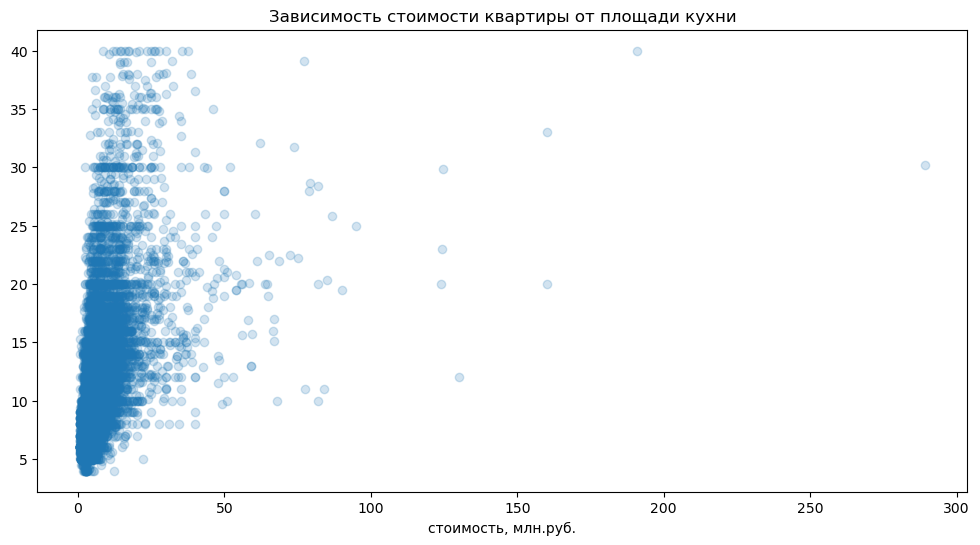

In [462]:
plt.figure(figsize=(12, 6))
plt.scatter(good_df.last_price_mill, good_df.kitchen_area, marker='o', linestyle='-', color='C0',alpha = 0.2)
plt.title('Зависимость стоимости квартиры от площади кухни')
plt.xlabel('стоимость, млн.руб.')
plt.show()

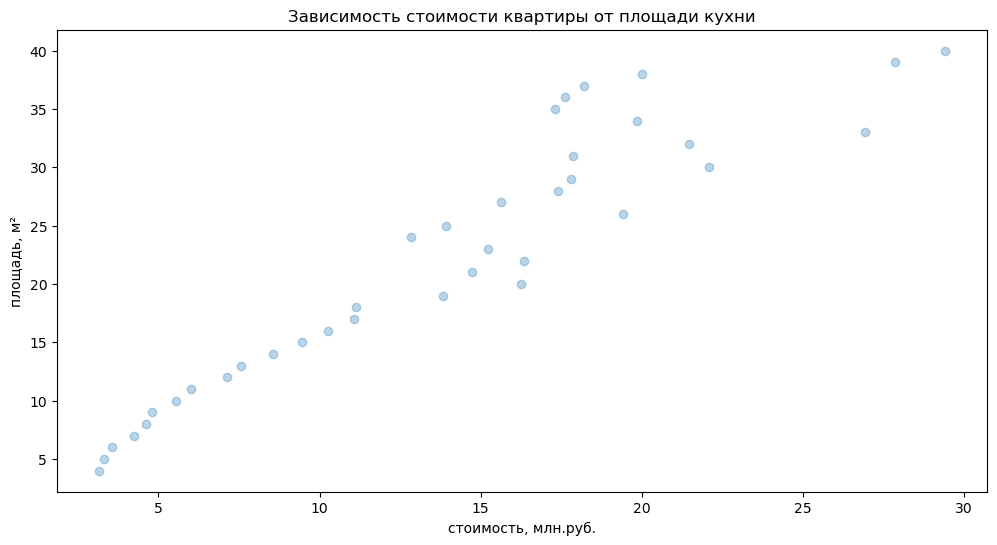

In [463]:
pivot_kitchen_area = good_df.round().pivot_table(index='kitchen_area', values='last_price_mill', aggfunc='mean').sort_values(by='kitchen_area')

plt.figure(figsize=(12, 6))
# plt.xlim([0, 20])
plt.scatter(pivot_kitchen_area.last_price_mill, pivot_kitchen_area.index, marker='o', linestyle='-', color='C0', alpha = 0.3)
plt.title('Зависимость стоимости квартиры от площади кухни')
plt.xlabel('стоимость, млн.руб.')
plt.ylabel('площадь, м²')

plt.show()

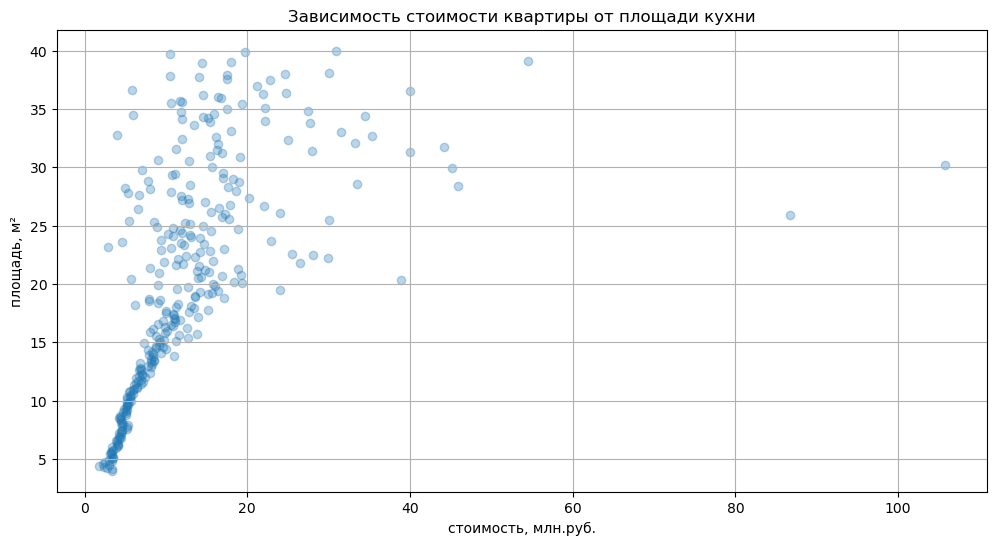

In [464]:
pivot_kitchen_area = good_df.round(1).pivot_table(index='kitchen_area', values='last_price_mill', aggfunc='mean').sort_values(by='kitchen_area')

plt.figure(figsize=(12, 6))
# plt.xlim([0, 20])
plt.scatter(pivot_kitchen_area.last_price_mill, pivot_kitchen_area.index, marker='o', linestyle='-', color='C0', alpha = 0.3)
plt.title('Зависимость стоимости квартиры от площади кухни')
plt.xlabel('стоимость, млн.руб.')
plt.ylabel('площадь, м²')
plt.grid()
plt.show()

In [376]:
round(good_df['kitchen_area'].corr(good_df['last_price']), 2)

0.49

<b>Вывод: </b>Зависимость между ценой и площади кухни прослеживается, если площадь кухни укрупнить т.е округлить до целого числа (<b>видна четкая линейная зависимость</b>) или до 1 знака после запятой. В случае с 1 знаком, то зависимости слабеет после 15 кв. метров и ценой около 10м.

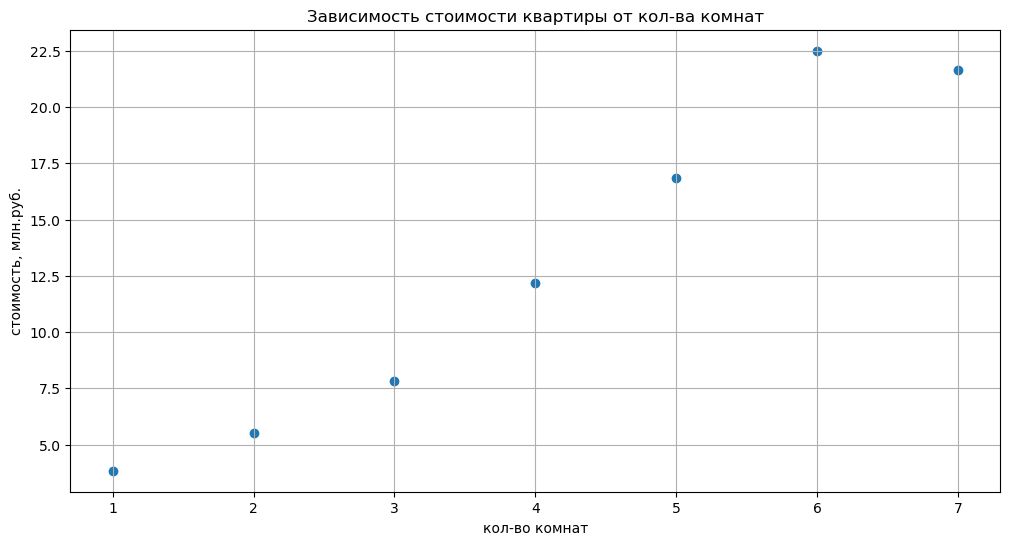

In [465]:
pivot_rooms = good_df.pivot_table(index='rooms', values='last_price_mill', aggfunc='mean').sort_values(by='rooms')

plt.figure(figsize=(12, 6))
# plt.xlim([0, 20])
plt.scatter(pivot_rooms.index, pivot_rooms.last_price_mill, marker='o', color='C0')
plt.title('Зависимость стоимости квартиры от кол-ва комнат')
plt.xlabel('кол-во комнат')
plt.ylabel('стоимость, млн.руб.')
plt.grid()
plt.show()

In [422]:
round(good_df['rooms'].corr(good_df['last_price']), 2)

0.4

<b>Вывод: </b>Можно отметить, что с ростом количества комнат растет и цена. Видим линейную зависимость. На 7-комнатной квартире зависимость пропадает


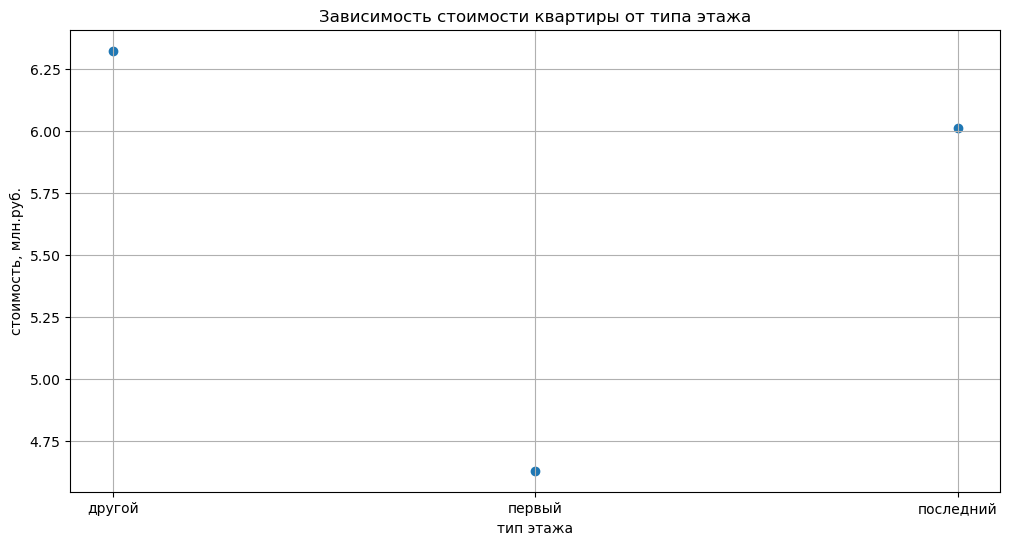

,last_price_mill
type_floor,
другой,6.321741
первый,4.631784
последний,6.009331


In [466]:
pivot_type_floor = good_df.pivot_table(index='type_floor', values='last_price_mill', aggfunc='mean').sort_values(by='type_floor')

plt.figure(figsize=(12, 6))
# plt.xlim([0, 20])
plt.scatter(pivot_type_floor.index, pivot_type_floor.last_price_mill, marker='o', color='C0')
plt.title('Зависимость стоимости квартиры от типа этажа')
plt.xlabel('тип этажа')
plt.ylabel('стоимость, млн.руб.')
plt.grid()
plt.show()
pivot_type_floor

<b>Вывод: </b>Можно заметить, что продается дешевле всего первый этаж. "Другой" этаж самый дорогой. Что логично, так как этих объектов недвижимости( другой этаж) намного больше. Ничего аномального не вижу. Все статистически закономерно.

In [534]:
# 10 населенных пунктов с наибольшим кол-во объявлений
top_10_pivot= good_df.pivot_table(index='locality_name_new', values='last_price', aggfunc=['count'])
top_10_pivot.columns = ['count']                                                                                                                
top_10_pivot = top_10_pivot.sort_values(by='count', ascending=False).head(10)
top_10_pivot

,count
locality_name_new,
санкт-петербург,13780
мурино,456
шушары,391
кудрово,376
всеволожск,357
пушкин,329
колпино,321
гатчина,290
парголово,288


In [475]:
# Оставляем в датафрейме данные из 10 населенных пунктов с наибольшим кол-во объявлений
final_good_df = good_df.query('locality_name_new in @top_10_pivot.index')
final_good_df = final_good_df.reset_index(drop=True)
final_good_df

,last_price,last_price_mill,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_ square,weekday,weekday_up,exposition_month,type_floor,city_centr_km
0,13000000.0,13.000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,482.0,2,755.0,NaN,120370.37,3,четверг,3,другой,16.03
1,3350000.0,3.350,40.40,2018-12-04,1,NaN,11,18.60,1,False,...,NaN,0,NaN,81.0,82920.79,1,вторник,12,первый,18.60
2,5196000.0,5.196,56.00,2015-08-20,2,NaN,5,34.30,4,False,...,90.0,2,574.0,558.0,92785.71,3,четверг,8,другой,13.93
3,3700000.0,3.700,37.30,2017-11-02,1,NaN,26,10.60,6,False,...,NaN,0,NaN,155.0,99195.71,3,четверг,11,другой,19.14
4,2900000.0,2.900,33.16,2018-05-23,1,NaN,27,15.43,26,False,...,NaN,<NA>,NaN,189.0,87454.76,2,среда,5,другой,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16773,9200000.0,9.200,101.00,2019-04-01,3,3.05,15,63.00,12,False,...,NaN,0,NaN,23.0,91089.11,0,понедельник,4,другой,14.43
16774,3550000.0,3.550,35.30,2018-02-28,1,2.86,15,16.30,4,False,...,353.0,2,652.0,29.0,100566.57,2,среда,2,другой,16.08
16775,5500000.0,5.500,52.00,2018-07-19,2,NaN,5,31.00,2,False,...,300.0,0,NaN,15.0,105769.23,3,четверг,7,другой,6.26
16776,9470000.0,9.470,72.90,2016-10-13,2,2.75,25,40.30,7,False,...,NaN,1,806.0,519.0,129903.98,3,четверг,10,другой,4.49


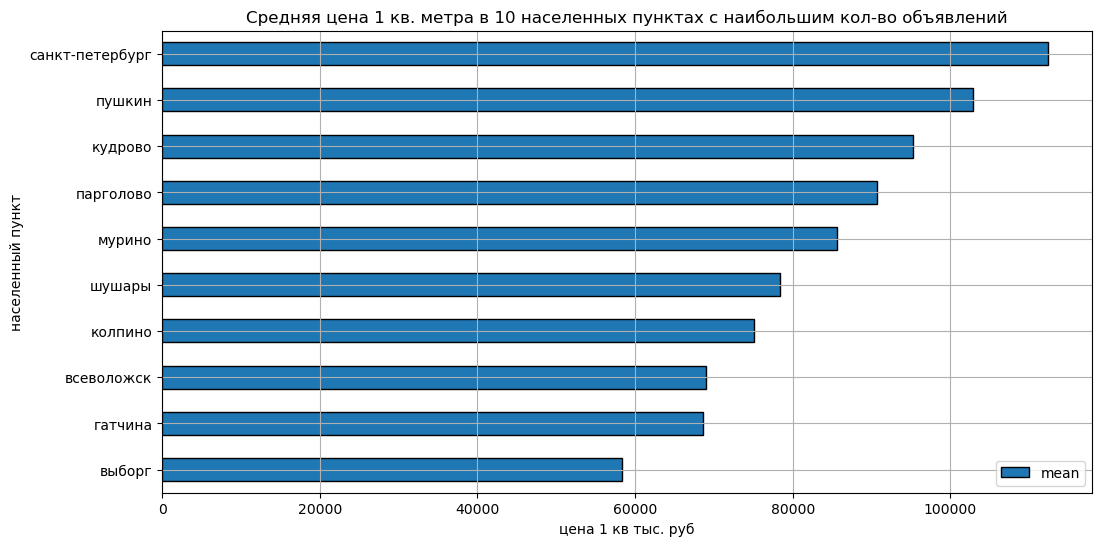

In [533]:
slice_final = final_good_df.pivot_table(index='locality_name_new', values='cost_per_ square', aggfunc=['count','mean','median'])
slice_final.columns = ['count','mean','median']
slice_final.sort_values(by='mean', ascending=True, inplace=True)
slice_final['mean'].plot(kind='barh', legend=True, grid=True, ec='black', figsize=(12, 6))
plt.title('Средняя цена 1 кв. метра в 10 населенных пунктах с наибольшим кол-во объявлений')
plt.xlabel('цена 1 кв тыс. руб')
plt.ylabel('населенный пункт')
plt.show()

<b>Вывод: </b> Как и предполагась в Санкт- Петербурге самая высокая стоимость квадратного метра. В Выборге оказалась самая низкая стоимость за квадратный метр.

In [554]:
spb_good_df = good_df.query('locality_name_new == "санкт-петербург"').round().pivot_table(index='city_centr_km', values='last_price_mill')
spb_good_df.columns = ['last_price_mill']
spb_good_df.head(10)

,last_price_mill
city_centr_km,
0.0,22.050000
1.0,17.044872
2.0,15.754789
3.0,10.148515
4.0,10.928214
5.0,11.544737
6.0,12.012270
7.0,13.185596
8.0,9.126437


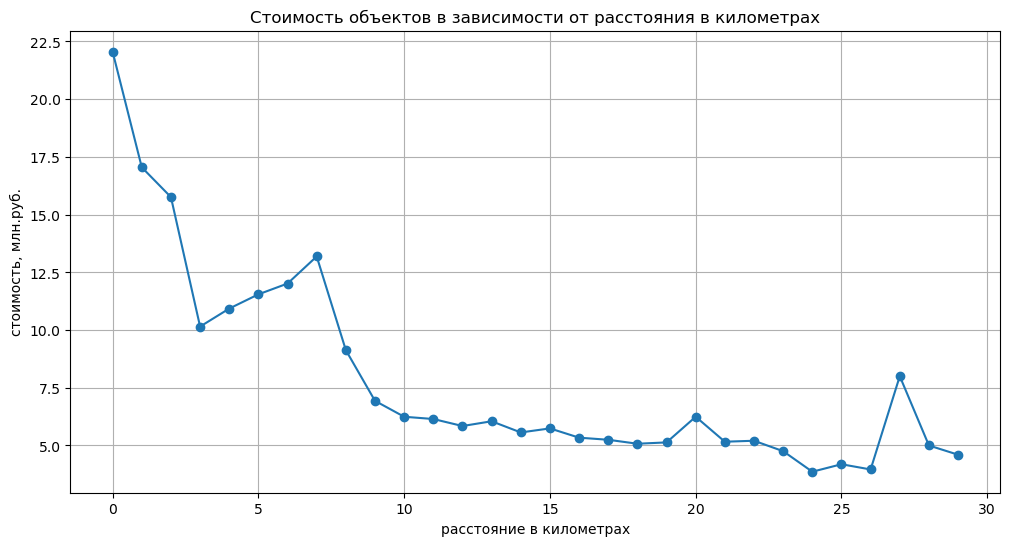

In [558]:
plt.figure(figsize=(12, 6))
# plt.xlim([25, 30])
plt.plot(spb_good_df.index, spb_good_df.last_price_mill, marker='o', color='C0')
plt.title('Стоимость объектов в зависимости от расстояния в километрах')
plt.xlabel('расстояние в километрах')
plt.ylabel('стоимость, млн.руб.')
plt.grid()
plt.show()

<b>Вывод:</b> C удалением от центра Санкт-Петербурга стоимость объектов недвижимости снижается в целом, хотя есть и пики. Но самый основной пик виден на расстоянии 27 километров. Скорее всего это связано с нахождением там элитного района или дачного поселка.



# Общий вывод

<b>Мы проанализировали и обработали архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет и сделали следующие выводы:</b>
- Выяснили , что в основном продают квартиры общей площадью около 40 - 45 кв. метров. И реже 30 кв. метров.

- Выяснили, что типичную жилую площадь, которую продают, находится в районе 17-19 и 30 кв.м. В меньшей степении в районе 43-44 кв.м.<b/>

- Выяснили, что в основном продают 1, 2, 3 - комнатные квартиры, а также оьъекты недвижимости находятся в 5 и 9 этажных зданиях.

- Выяснили, что относительно быстрой продажей можно считать от 44 до 100 дней. Продажи более 230 дней (более 75% данных) уже можно считать долгими.

- Выяснили, что на цену как и предполагалось, влияют в основном общая площадь, в меньшей степени жилая площадь, а также площадь кухни. А также выяснили, что на цену влияет комнатность объекта недвижимости.

- Выянсли, что в Санкт- Петербурге самая высокая стоимость квадратного метра. В Выборге оказалась самая низкая стоимость за квадратный метр. А также в целом с удалением от центра Санкт-Петербурга стоимость объектов недвижимости снижается, хотя есть и пики, которые скорее всего связаны с нахождением там элитного района или дачного поселка.
